# Loading  libraries

In [1]:
import numpy as np
import array
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate
from matplotlib import colors as mcolors
from __future__ import division
colors = ["black","cyan","darkmagenta","orange","red","blue","darkred","khaki","brown","pink"]


# Making the initial conditions

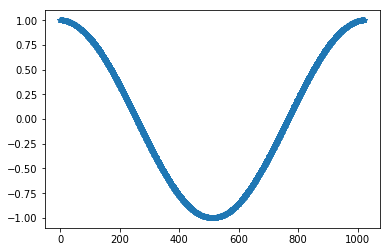

('Should be 0 for the symmetric case: ', 0.0)
('The second derivative at minimum is:', 5.6473443456717121e-05)
('The second analytical derivative at minimum is:', 0.00015059821168654416)


In [133]:
n_grid = 2**10 # size of data array, number of points for the IC in 1D
# phi0 = 1.e-4
# myseed = 444
# binfac = 4**5
# f5=open('./real_pi.txt', 'w')
# np.random.seed(seed=myseed)
# Ma
phism=np.zeros(n_grid) # phism is going to be phi in comsology and is made either as a random noise or a given function for the study
# sigma=np.sqrt(sigmax2)
for i in range( int((n_grid+1)/2) ):
#     if i<=(nx-1)/2:
    phism[i]=1.0*np.cos(np.pi*2.0*i/n_grid) # taking phi initially as cosine function for half od the data
#     phism[i]=((i-(n_grid/2))/n_grid)**2  # taking phi initially as cosine function for half od the data
    phism[n_grid-1-i]=phism[i] # the other half are made in a way that to make the data symmetric.
        
# np.savetxt("real_phi.txt",phism)
spec = np.abs(np.fft.fft(phism))**2 # computing the spectrum which is absolute value of Forier transformation
freqs = np.fft.fftfreq(len(phism)) # discrete frequencies associated to the length of the field

# pi  = phism # In case we want to set at the initial time pi = phi otherwise it is set by the PDE, like in the 3D case. 
# phism = 1.e-5 * (phism);
plt.plot(phism,"*")
plt.show()
#Making sure that the made data is symmetric
for i in range(n_grid):
    ss=+phism[n_grid-i-1]-phism[i]
print("Should be 0 for the symmetric case: ", ss) # Has to be 0 otherwise the data is not symmetric
phism[0]
dx=1
print("The second derivative at minimum is:",np.max((np.roll(phism,1)+np.roll(phism,-1)-2.0*phism)/dx**2))
print("The second analytical derivative at minimum is:",np.pi**2*16/(n_grid**2))



In [136]:
###########################
##### Initial conditions:##
###########################
pi   = np.zeros(n_grid)
pi_prime = np.zeros(n_grid)

###########################
##### Parameters for kessence:##
###########################
tauin = 0.0001;
dt    = 0.9# cs2 = 50 #1.e-3
dx  = 1.
tauend = 50000.0 #100.0
tauwrite=(tauend-tauin)/400.
tau = tauin

###########################
##### simulation 1+1 D##
###########################
list_tau_pi=[]
list_pi=[]
list_pi_prime=[]
list_tau=[]
list_dpi_dx=[]
list_d2pi_dx2 =[]

pi_prime = 1*phism
pi =0.* phism;

A = 0;
B = 1;

while (tau < tauend and np.abs(np.max(pi))<1.e6 ):
    ########################
    piplus  = np.roll(pi,1)
    pi_2_plus  = np.roll(pi,2)
    piminus = np.roll(pi,-1)
    pi_2minus = np.roll(pi,-2)
    ######3##
    pi_prime_plus  = np.roll(pi_prime,1)
    pi_prime_minus = np.roll(pi_prime,-1)

    laplacepi_1 = ((-pi_2_plus + 16*piplus -30.0*pi + 16*piminus-pi_2minus)/(12.0*dx**2));
    laplacepi_2 = ((1*piplus -2.0*pi + 1*piminus)/(1.0*dx**2));
    factor = laplacepi_1/laplacepi_2;
    print(factor)
#     linear_term = 3*w*H*zeta - 3*cs2*(H**2*pi-H*psism-H_prime*pi-Phi_prime)+ cs2*laplacepi;
    ############# NL terms and definitions #########
    dpi_dx = (pi_2minus - pi_2_plus - 8*piminus + 8*piplus -0.*pi)/(12.0*dx);
    gradpi_squared = dpi_dx**2;

    pi_pp =  +A * gradpi_squared + B * laplacepi; 
    pi_prime = pi_prime + dt*(pi_pp); # pi_v
    pi  = pi+dt*(pi_prime) # pi

#     if (tau==tauin or np.abs(np.int(tau/tauwrite)-tau/tauwrite)<dt/tauwrite):
    if (tau==tauin or np.abs(np.int(tau/tauwrite)-tau/tauwrite)<dt/tauwrite):

        list_tau_pi.append(pi)
        list_pi_prime.append(pi_prime)
        list_tau.append(tau)
        #### Spatil derivatives
        list_dpi_dx.append(dpi_dx)
        list_d2pi_dx2.append(laplacepi)
        
#         print('piplus',piplus[0],"    tau:",tau)
    tau = tau + dt


/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


[ nan  nan  nan ...,  nan  nan  nan]
[ 0.90284936  1.04726147  0.99389475 ...,  0.99389475  1.04726149
  0.90284932]
[ 0.89529523  1.04997002  0.99080329 ...,  0.99080329  1.04997005
  0.89529516]
[ 0.88725677  1.05262303  0.9876866  ...,  0.98768659  1.05262307
  0.88725667]
[ 0.87868588  1.05522218  0.98454434 ...,  0.98454433  1.05522223
  0.87868575]
[ 0.86952783  1.0577691   0.98137621 ...,  0.98137621  1.05776916
  0.86952767]
[ 0.85972016  1.06026534  0.9781819  ...,  0.97818189  1.06026541
  0.85971995]
[ 0.84919119  1.06271241  0.97496106 ...,  0.97496105  1.06271248
  0.84919095]
[ 0.83785833  1.06511174  0.97171337 ...,  0.97171336  1.06511182
  0.83785804]
[ 0.82562584  1.06746472  0.9684385  ...,  0.96843848  1.06746481
  0.82562551]
[ 0.81238219  1.06977267  0.96513609 ...,  0.96513607  1.06977277
  0.8123818 ]
[ 0.79799659  1.07203688  0.96180581 ...,  0.96180579  1.07203698
  0.79799613]
[ 0.78231469  1.07425858  0.9584473  ...,  0.95844727  1.07425868
  0.78231416]
[ 0

[ 1.17748976  1.24391997  6.11073928 ...,  6.11047974  1.24391995
  1.17749023]
[ 1.17736782  1.24408756  6.01191954 ...,  6.01166995  1.24408754
  1.17736829]
[ 1.17724682  1.24425428  5.91748336 ...,  5.91724311  1.24425426
  1.17724729]
[ 1.17712676  1.24442014  5.82714539 ...,  5.82691391  1.24442013
  1.17712722]
[ 1.17700761  1.24458516  5.74064454 ...,  5.7404213   1.24458514
  1.17700808]
[ 1.17688938  1.24474933  5.65774141 ...,  5.65752592  1.24474931
  1.17688984]
[ 1.17677204  1.24491266  5.57821611 ...,  5.57800794  1.24491264
  1.17677251]
[ 1.1766556   1.24507515  5.50186634 ...,  5.50166507  1.24507513
  1.17665606]
[ 1.17654003  1.24523683  5.42850561 ...,  5.42831086  1.2452368   1.1765405 ]
[ 1.17642533  1.24539768  5.35796175 ...,  5.35777318  1.24539765
  1.1764258 ]
[ 1.1763115   1.24555772  5.2900756  ...,  5.28989287  1.24555769
  1.17631196]
[ 1.17619851  1.24571695  5.22469973 ...,  5.22452253  1.24571692
  1.17619898]
[ 1.17608636  1.24587538  5.16169743 ...,

[ 1.16027118  1.27284298  2.28425306 ...,  2.28423688  1.27284284
  1.16027164]
[ 1.16024618  1.27289439  2.2827601  ...,  2.28274396  1.27289424
  1.16024664]
[ 1.16022127  1.27294564  2.28127554 ...,  2.28125943  1.27294549
  1.16022174]
[ 1.16019645  1.27299675  2.27979928 ...,  2.27978322  1.2729966
  1.16019691]
[ 1.16017172  1.27304771  2.27833127 ...,  2.27831524  1.27304756
  1.16017218]
[ 1.16014707  1.27309853  2.27687144 ...,  2.27685545  1.27309838
  1.16014753]
[ 1.16012251  1.2731492   2.27541971 ...,  2.27540376  1.27314905
  1.16012297]
[ 1.16009803  1.27319973  2.27397603 ...,  2.27396011  1.27319958
  1.16009849]
[ 1.16007364  1.27325011  2.27254032 ...,  2.27252444  1.27324996
  1.1600741 ]
[ 1.16004933  1.27330035  2.27111252 ...,  2.27109667  1.2733002
  1.16004979]
[ 1.16002511  1.27335045  2.26969256 ...,  2.26967675  1.2733503
  1.16002557]
[ 1.16000097  1.27340041  2.26828038 ...,  2.26826461  1.27340026
  1.16000143]
[ 1.15997691  1.27345022  2.26687592 ...,  

[ 1.15533461  1.28368679  2.0402324  ...,  2.04022183  1.28368658
  1.15533506]
[ 1.15532395  1.28371181  2.03979699 ...,  2.03978642  1.28371161
  1.15532441]
[ 1.15531331  1.28373678  2.03936289 ...,  2.03935234  1.28373658
  1.15531377]
[ 1.1553027   1.2837617   2.03893011 ...,  2.03891957  1.2837615
  1.15530316]
[ 1.15529212  1.28378658  2.03849865 ...,  2.03848811  1.28378637
  1.15529258]
[ 1.15528156  1.2838114   2.03806849 ...,  2.03805796  1.28381119
  1.15528201]
[ 1.15527102  1.28383617  2.03763962 ...,  2.03762911  1.28383597
  1.15527148]
[ 1.15526051  1.2838609   2.03721206 ...,  2.03720155  1.28386069
  1.15526096]
[ 1.15525002  1.28388557  2.03678578 ...,  2.03677528  1.28388536
  1.15525048]
[ 1.15523955  1.2839102   2.03636078 ...,  2.03635029  1.28390999
  1.15524001]
[ 1.15522911  1.28393477  2.03593706 ...,  2.03592657  1.28393457
  1.15522957]
[ 1.15521869  1.2839593   2.0355146  ...,  2.03550413  1.28395909
  1.15521915]
[ 1.1552083   1.28398378  2.03509342 ...,

[ 1.15297802  1.28940542  1.95128274 ...,  1.95127392  1.28940518
  1.15297847]
[ 1.15297208  1.28942031  1.95107588 ...,  1.95106706  1.28942007
  1.15297254]
[ 1.15296616  1.28943517  1.95086945 ...,  1.95086064  1.28943494
  1.15296661]
[ 1.15296024  1.28945002  1.95066345 ...,  1.95065464  1.28944978
  1.1529607 ]
[ 1.15295434  1.28946484  1.95045789 ...,  1.95044908  1.2894646
  1.15295479]
[ 1.15294844  1.28947964  1.95025275 ...,  1.95024395  1.2894794   1.1529489 ]
[ 1.15294256  1.28949442  1.95004805 ...,  1.95003925  1.28949418
  1.15294302]
[ 1.15293668  1.28950917  1.94984376 ...,  1.94983497  1.28950893
  1.15293714]
[ 1.15293082  1.2895239   1.94963991 ...,  1.94963112  1.28952366
  1.15293128]
[ 1.15292497  1.28953861  1.94943648 ...,  1.94942769  1.28953837
  1.15292542]
[ 1.15291912  1.2895533   1.94923347 ...,  1.94922469  1.28955306
  1.15291958]
[ 1.15291329  1.28956796  1.94903088 ...,  1.9490221   1.28956772
  1.15291374]
[ 1.15290746  1.2895826   1.94882872 ..., 

[ 1.15153083  1.29311312  1.90309195 ...,  1.90308401  1.29311286
  1.15153129]
[ 1.15152711  1.29312283  1.90297383 ...,  1.90296589  1.29312258
  1.15152757]
[ 1.15152341  1.29313254  1.90285589 ...,  1.90284795  1.29313228
  1.15152386]
[ 1.1515197   1.29314223  1.90273814 ...,  1.9027302   1.29314198
  1.15152016]
[ 1.151516    1.29315192  1.90262057 ...,  1.90261264  1.29315166
  1.15151646]
[ 1.15151231  1.29316159  1.90250319 ...,  1.90249526  1.29316133
  1.15151276]
[ 1.15150862  1.29317124  1.902386   ...,  1.90237807  1.29317099
  1.15150908]
[ 1.15150493  1.29318089  1.90226899 ...,  1.90226106  1.29318063
  1.15150539]
[ 1.15150126  1.29319052  1.90215216 ...,  1.90214424  1.29319026
  1.15150171]
[ 1.15149758  1.29320015  1.90203552 ...,  1.9020276   1.29319989
  1.15149804]
[ 1.15149391  1.29320976  1.90191906 ...,  1.90191115  1.2932095
  1.15149437]
[ 1.15149025  1.29321935  1.90180279 ...,  1.90179487  1.29321909
  1.1514907 ]
[ 1.15148659  1.29322894  1.9016867  ...,

[ 1.15060696  1.29556349  1.87452324 ...,  1.8745158   1.29556322
  1.15060742]
[ 1.15060439  1.2955704   1.87444606 ...,  1.87443863  1.29557012
  1.15060485]
[ 1.15060183  1.29557729  1.87436899 ...,  1.87436155  1.29557702
  1.15060228]
[ 1.15059927  1.29558418  1.87429201 ...,  1.87428458  1.29558391
  1.15059972]
[ 1.15059671  1.29559106  1.87421513 ...,  1.8742077   1.29559079
  1.15059716]
[ 1.15059415  1.29559794  1.87413835 ...,  1.87413092  1.29559766
  1.15059461]
[ 1.1505916   1.2956048   1.87406167 ...,  1.87405424  1.29560453
  1.15059206]
[ 1.15058905  1.29561166  1.87398509 ...,  1.87397766  1.29561139
  1.15058951]
[ 1.1505865   1.29561851  1.8739086  ...,  1.87390117  1.29561824
  1.15058696]
[ 1.15058396  1.29562536  1.87383221 ...,  1.87382479  1.29562509
  1.15058441]
[ 1.15058142  1.2956322   1.87375592 ...,  1.8737485   1.29563192
  1.15058187]
[ 1.15057888  1.29563903  1.87367973 ...,  1.87367231  1.29563876
  1.15057933]
[ 1.15057634  1.29564585  1.87360363 ...

[ 1.1499236   1.29741972  1.85439349 ...,  1.8543864   1.29741943
  1.14992406]
[ 1.14992175  1.29742481  1.85433996 ...,  1.85433287  1.29742452
  1.1499222 ]
[ 1.14991989  1.29742989  1.85428649 ...,  1.85427939  1.29742961
  1.14992035]
[ 1.14991804  1.29743497  1.85423307 ...,  1.85422598  1.29743469
  1.1499185 ]
[ 1.14991619  1.29744005  1.85417971 ...,  1.85417262  1.29743976
  1.14991665]
[ 1.14991434  1.29744512  1.85412641 ...,  1.85411931  1.29744484
  1.1499148 ]
[ 1.1499125   1.29745019  1.85407316 ...,  1.85406607  1.2974499
  1.14991295]
[ 1.14991065  1.29745525  1.85401997 ...,  1.85401288  1.29745497
  1.14991111]
[ 1.14990881  1.29746031  1.85396684 ...,  1.85395975  1.29746002
  1.14990927]
[ 1.14990697  1.29746536  1.85391376 ...,  1.85390667  1.29746508
  1.14990743]
[ 1.14990513  1.29747041  1.85386074 ...,  1.85385365  1.29747013
  1.14990559]
[ 1.1499033   1.29747545  1.85380778 ...,  1.85380069  1.29747517
  1.14990375]
[ 1.14990146  1.29748049  1.85375487 ...,

[ 1.14941998  1.29881229  1.84007    ...,  1.84006314  1.298812    1.14942043]
[ 1.14941857  1.2988162   1.84003067 ...,  1.84002381  1.29881591
  1.14941903]
[ 1.14941717  1.29882011  1.83999137 ...,  1.83998451  1.29881982
  1.14941762]
[ 1.14941577  1.29882401  1.83995211 ...,  1.83994525  1.29882372
  1.14941622]
[ 1.14941437  1.29882792  1.83991288 ...,  1.83990603  1.29882762
  1.14941482]
[ 1.14941297  1.29883181  1.83987369 ...,  1.83986684  1.29883152
  1.14941342]
[ 1.14941157  1.29883571  1.83983454 ...,  1.83982769  1.29883542
  1.14941203]
[ 1.14941017  1.2988396   1.83979542 ...,  1.83978857  1.29883931
  1.14941063]
[ 1.14940878  1.29884349  1.83975634 ...,  1.83974949  1.2988432
  1.14940923]
[ 1.14940739  1.29884738  1.8397173  ...,  1.83971045  1.29884708
  1.14940784]
[ 1.14940599  1.29885126  1.83967829 ...,  1.83967144  1.29885097
  1.14940645]
[ 1.1494046   1.29885514  1.83963931 ...,  1.83963246  1.29885485
  1.14940505]
[ 1.14940321  1.29885902  1.83960037 ..., 

[ 1.14904447  1.29986451  1.82966013 ...,  1.82965345  1.29986421
  1.14904492]
[ 1.14904336  1.29986763  1.82962975 ...,  1.82962306  1.29986733
  1.14904381]
[ 1.14904225  1.29987075  1.82959939 ...,  1.82959271  1.29987045
  1.1490427 ]
[ 1.14904114  1.29987387  1.82956905 ...,  1.82956237  1.29987357
  1.1490416 ]
[ 1.14904004  1.29987698  1.82953874 ...,  1.82953206  1.29987668
  1.14904049]
[ 1.14903893  1.2998801   1.82950846 ...,  1.82950178  1.2998798
  1.14903939]
[ 1.14903783  1.29988321  1.8294782  ...,  1.82947152  1.29988291
  1.14903828]
[ 1.14903673  1.29988632  1.82944796 ...,  1.82944128  1.29988602
  1.14903718]
[ 1.14903562  1.29988943  1.82941775 ...,  1.82941107  1.29988913
  1.14903608]
[ 1.14903452  1.29989253  1.82938756 ...,  1.82938088  1.29989223
  1.14903498]
[ 1.14903342  1.29989563  1.82935739 ...,  1.82935072  1.29989533
  1.14903388]
[ 1.14903232  1.29989873  1.82932725 ...,  1.82932058  1.29989843
  1.14903278]
[ 1.14903122  1.29990183  1.82929714 ...,

[ 1.14874431  1.30071425  1.82149956 ...,  1.82149301  1.30071395
  1.14874477]
[ 1.14874342  1.3007168   1.82147539 ...,  1.82146884  1.3007165
  1.14874387]
[ 1.14874252  1.30071935  1.82145123 ...,  1.82144468  1.30071905
  1.14874297]
[ 1.14874162  1.3007219   1.82142709 ...,  1.82142054  1.30072159
  1.14874208]
[ 1.14874073  1.30072444  1.82140297 ...,  1.82139642  1.30072414
  1.14874118]
[ 1.14873983  1.30072699  1.82137886 ...,  1.82137232  1.30072668
  1.14874029]
[ 1.14873894  1.30072953  1.82135478 ...,  1.82134823  1.30072923
  1.1487394 ]
[ 1.14873805  1.30073207  1.82133071 ...,  1.82132416  1.30073177
  1.1487385 ]
[ 1.14873716  1.30073461  1.82130665 ...,  1.82130011  1.30073431
  1.14873761]
[ 1.14873626  1.30073715  1.82128262 ...,  1.82127607  1.30073684
  1.14873672]
[ 1.14873537  1.30073968  1.8212586  ...,  1.82125205  1.30073938
  1.14873583]
[ 1.14873448  1.30074222  1.8212346  ...,  1.82122805  1.30074192
  1.14873493]
[ 1.14873359  1.30074475  1.82121061 ...,

[ 1.14849742  1.30141908  1.81489098 ...,  1.81488454  1.30141877
  1.14849788]
[ 1.14849668  1.3014212   1.81487132 ...,  1.81486487  1.30142089
  1.14849714]
[ 1.14849594  1.30142332  1.81485166 ...,  1.81484522  1.30142301
  1.1484964 ]
[ 1.1484952   1.30142544  1.81483203 ...,  1.81482558  1.30142513
  1.14849566]
[ 1.14849446  1.30142755  1.8148124  ...,  1.81480596  1.30142725
  1.14849492]
[ 1.14849373  1.30142967  1.81479278 ...,  1.81478634  1.30142936
  1.14849418]
[ 1.14849299  1.30143178  1.81477318 ...,  1.81476674  1.30143147
  1.14849344]
[ 1.14849225  1.3014339   1.81475359 ...,  1.81474715  1.30143359
  1.14849271]
[ 1.14849152  1.30143601  1.81473402 ...,  1.81472758  1.3014357
  1.14849197]
[ 1.14849078  1.30143812  1.81471446 ...,  1.81470801  1.30143781
  1.14849123]
[ 1.14849004  1.30144023  1.8146949  ...,  1.81468846  1.30143992
  1.1484905 ]
[ 1.14848931  1.30144233  1.81467537 ...,  1.81466893  1.30144203
  1.14848976]
[ 1.14848857  1.30144444  1.81465584 ...,

[ 1.14828029  1.30204339  1.8091548  ...,  1.80914844  1.30204307
  1.14828074]
[ 1.14827967  1.30204516  1.80913867 ...,  1.80913232  1.30204485
  1.14828013]
[ 1.14827906  1.30204693  1.80912255 ...,  1.8091162   1.30204662
  1.14827951]
[ 1.14827845  1.3020487   1.80910644 ...,  1.80910009  1.30204839
  1.1482789 ]
[ 1.14827783  1.30205047  1.80909034 ...,  1.80908399  1.30205016
  1.14827829]
[ 1.14827722  1.30205224  1.80907425 ...,  1.8090679   1.30205193
  1.14827767]
[ 1.14827661  1.302054    1.80905817 ...,  1.80905182  1.30205369
  1.14827706]
[ 1.14827599  1.30205577  1.8090421  ...,  1.80903575  1.30205546
  1.14827645]
[ 1.14827538  1.30205754  1.80902604 ...,  1.80901969  1.30205722
  1.14827584]
[ 1.14827477  1.3020593   1.80900999 ...,  1.80900364  1.30205899
  1.14827522]
[ 1.14827416  1.30206106  1.80899394 ...,  1.80898759  1.30206075
  1.14827461]
[ 1.14827355  1.30206283  1.80897791 ...,  1.80897156  1.30206251  1.148274  ]
[ 1.14827294  1.30206459  1.80896188 ...,

[ 1.14811057  1.30253426  1.80471989 ...,  1.80471361  1.30253395
  1.14811103]
[ 1.14811005  1.30253579  1.80470626 ...,  1.80469998  1.30253547
  1.1481105 ]
[ 1.14810952  1.3025373   1.80469263 ...,  1.80468635  1.30253699
  1.14810998]
[ 1.148109    1.30253882  1.80467901 ...,  1.80467273  1.30253851
  1.14810945]
[ 1.14810848  1.30254034  1.8046654  ...,  1.80465912  1.30254003
  1.14810893]
[ 1.14810795  1.30254186  1.8046518  ...,  1.80464552  1.30254154
  1.14810841]
[ 1.14810743  1.30254338  1.8046382  ...,  1.80463192  1.30254306
  1.14810788]
[ 1.14810691  1.30254489  1.80462461 ...,  1.80461833  1.30254458
  1.14810736]
[ 1.14810639  1.30254641  1.80461103 ...,  1.80460475  1.30254609
  1.14810684]
[ 1.14810586  1.30254792  1.80459745 ...,  1.80459117  1.3025476
  1.14810632]
[ 1.14810534  1.30254943  1.80458389 ...,  1.80457761  1.30254912
  1.1481058 ]
[ 1.14810482  1.30255095  1.80457033 ...,  1.80456405  1.30255063
  1.14810527]
[ 1.1481043   1.30255246  1.80455677 ...,

[ 1.14796807  1.30294844  1.80102839 ...,  1.80102217  1.30294812
  1.14796852]
[ 1.14796761  1.30294976  1.80101668 ...,  1.80101045  1.30294944
  1.14796807]
[ 1.14796716  1.30295108  1.80100497 ...,  1.80099874  1.30295077
  1.14796761]
[ 1.1479667   1.30295241  1.80099326 ...,  1.80098704  1.30295209
  1.14796716]
[ 1.14796625  1.30295373  1.80098156 ...,  1.80097534  1.30295341
  1.1479667 ]
[ 1.1479658   1.30295505  1.80096987 ...,  1.80096365  1.30295473
  1.14796625]
[ 1.14796534  1.30295637  1.80095818 ...,  1.80095196  1.30295605
  1.1479658 ]
[ 1.14796489  1.30295769  1.8009465  ...,  1.80094028  1.30295737
  1.14796535]
[ 1.14796444  1.302959    1.80093482 ...,  1.8009286   1.30295869
  1.14796489]
[ 1.14796399  1.30296032  1.80092315 ...,  1.80091693  1.30296     1.14796444]
[ 1.14796353  1.30296164  1.80091149 ...,  1.80090527  1.30296132
  1.14796399]
[ 1.14796308  1.30296296  1.80089983 ...,  1.80089361  1.30296264
  1.14796354]
[ 1.14796263  1.30296427  1.80088818 ...,

[ 1.14784402  1.30331044  1.79783895 ...,  1.79783277  1.30331012
  1.14784447]
[ 1.14784362  1.30331161  1.79782877 ...,  1.79782259  1.30331129
  1.14784408]
[ 1.14784323  1.30331277  1.79781859 ...,  1.79781242  1.30331245
  1.14784368]
[ 1.14784283  1.30331393  1.79780843 ...,  1.79780225  1.30331361
  1.14784328]
[ 1.14784243  1.30331509  1.79779826 ...,  1.79779209  1.30331477
  1.14784289]
[ 1.14784204  1.30331625  1.7977881  ...,  1.79778193  1.30331593
  1.14784249]
[ 1.14784164  1.30331741  1.79777795 ...,  1.79777178  1.30331709
  1.14784209]
[ 1.14784124  1.30331856  1.7977678  ...,  1.79776163  1.30331824
  1.1478417 ]
[ 1.14784085  1.30331972  1.79775766 ...,  1.79775148  1.3033194   1.1478413 ]
[ 1.14784045  1.30332088  1.79774752 ...,  1.79774135  1.30332056
  1.14784091]
[ 1.14784006  1.30332204  1.79773738 ...,  1.79773121  1.30332172
  1.14784051]
[ 1.14783966  1.30332319  1.79772725 ...,  1.79772108  1.30332287
  1.14784012]
[ 1.14783927  1.30332435  1.79771713 ...,

[ 1.14773227  1.30363777  1.79498437 ...,  1.79497824  1.30363744
  1.14773272]
[ 1.14773192  1.30363879  1.79497548 ...,  1.79496935  1.30363847
  1.14773238]
[ 1.14773157  1.30363982  1.79496659 ...,  1.79496046  1.30363949
  1.14773203]
[ 1.14773122  1.30364084  1.79495771 ...,  1.79495158  1.30364052
  1.14773168]
[ 1.14773088  1.30364186  1.79494883 ...,  1.7949427   1.30364154
  1.14773133]
[ 1.14773053  1.30364289  1.79493995 ...,  1.79493382  1.30364256
  1.14773098]
[ 1.14773018  1.30364391  1.79493108 ...,  1.79492495  1.30364359
  1.14773063]
[ 1.14772983  1.30364493  1.79492221 ...,  1.79491608  1.30364461
  1.14773028]
[ 1.14772948  1.30364595  1.79491334 ...,  1.79490722  1.30364563
  1.14772993]
[ 1.14772913  1.30364697  1.79490448 ...,  1.79489836  1.30364665
  1.14772959]
[ 1.14772879  1.30364799  1.79489563 ...,  1.7948895   1.30364767
  1.14772924]
[ 1.14772844  1.30364901  1.79488677 ...,  1.79488065  1.30364869
  1.14772889]
[ 1.14772809  1.30365003  1.79487792 ...

[ 1.1476352   1.30392303  1.79251898 ...,  1.79251289  1.3039227
  1.14763565]
[ 1.14763489  1.30392394  1.79251113 ...,  1.79250504  1.30392361
  1.14763534]
[ 1.14763458  1.30392485  1.79250328 ...,  1.79249719  1.30392453
  1.14763503]
[ 1.14763427  1.30392576  1.79249544 ...,  1.79248935  1.30392544
  1.14763472]
[ 1.14763396  1.30392667  1.7924876  ...,  1.79248151  1.30392635
  1.14763441]
[ 1.14763365  1.30392758  1.79247976 ...,  1.79247367  1.30392726
  1.1476341 ]
[ 1.14763334  1.30392849  1.79247192 ...,  1.79246583  1.30392817
  1.14763379]
[ 1.14763303  1.3039294   1.79246409 ...,  1.792458    1.30392908
  1.14763348]
[ 1.14763272  1.30393031  1.79245626 ...,  1.79245017  1.30392999
  1.14763317]
[ 1.14763241  1.30393122  1.79244844 ...,  1.79244235  1.3039309
  1.14763286]
[ 1.1476321   1.30393213  1.79244061 ...,  1.79243453  1.30393181
  1.14763256]
[ 1.14763179  1.30393304  1.79243279 ...,  1.79242671  1.30393272
  1.14763225]
[ 1.14763148  1.30393395  1.79242498 ..., 

[ 1.14754597  1.30418599  1.79026447 ...,  1.79025841  1.30418567
  1.14754642]
[ 1.14754569  1.30418681  1.79025751 ...,  1.79025146  1.30418648
  1.14754614]
[ 1.14754541  1.30418762  1.79025056 ...,  1.7902445   1.3041873
  1.14754587]
[ 1.14754514  1.30418844  1.79024361 ...,  1.79023755  1.30418811
  1.14754559]
[ 1.14754486  1.30418925  1.79023666 ...,  1.79023061  1.30418892
  1.14754532]
[ 1.14754459  1.30419006  1.79022971 ...,  1.79022366  1.30418974
  1.14754504]
[ 1.14754431  1.30419088  1.79022277 ...,  1.79021672  1.30419055
  1.14754477]
[ 1.14754404  1.30419169  1.79021583 ...,  1.79020978  1.30419136
  1.14754449]
[ 1.14754376  1.3041925   1.79020889 ...,  1.79020284  1.30419218
  1.14754421]
[ 1.14754349  1.30419331  1.79020196 ...,  1.7901959   1.30419299
  1.14754394]
[ 1.14754321  1.30419413  1.79019503 ...,  1.79018897  1.3041938
  1.14754366]
[ 1.14754294  1.30419494  1.7901881  ...,  1.79018204  1.30419461
  1.14754339]
[ 1.14754266  1.30419575  1.79018117 ..., 

[ 1.14746849  1.3044149   1.788316   ...,  1.78830998  1.30441458
  1.14746895]
[ 1.14746825  1.30441564  1.78830977 ...,  1.78830375  1.30441531
  1.1474687 ]
[ 1.147468    1.30441637  1.78830355 ...,  1.78829753  1.30441604
  1.14746845]
[ 1.14746775  1.30441711  1.78829733 ...,  1.7882913   1.30441678
  1.1474682 ]
[ 1.1474675   1.30441784  1.78829111 ...,  1.78828508  1.30441751
  1.14746796]
[ 1.14746725  1.30441857  1.78828489 ...,  1.78827887  1.30441824
  1.14746771]
[ 1.14746701  1.3044193   1.78827868 ...,  1.78827265  1.30441898
  1.14746746]
[ 1.14746676  1.30442004  1.78827246 ...,  1.78826644  1.30441971
  1.14746721]
[ 1.14746651  1.30442077  1.78826625 ...,  1.78826023  1.30442044
  1.14746696]
[ 1.14746626  1.3044215   1.78826004 ...,  1.78825402  1.30442117
  1.14746672]
[ 1.14746602  1.30442223  1.78825384 ...,  1.78824781  1.30442191
  1.14746647]
[ 1.14746577  1.30442296  1.78824763 ...,  1.78824161  1.30442264
  1.14746622]
[ 1.14746552  1.30442369  1.78824143 ...

[ 1.14739687  1.30462701  1.7865221  ...,  1.7865161   1.30462669
  1.14739733]
[ 1.14739665  1.30462768  1.78651651 ...,  1.78651051  1.30462735
  1.1473971 ]
[ 1.14739643  1.30462834  1.78651092 ...,  1.78650492  1.30462801
  1.14739688]
[ 1.1473962   1.304629    1.78650533 ...,  1.78649933  1.30462867
  1.14739666]
[ 1.14739598  1.30462967  1.78649975 ...,  1.78649375  1.30462934
  1.14739643]
[ 1.14739576  1.30463033  1.78649416 ...,  1.78648817  1.30463     1.14739621]
[ 1.14739553  1.30463099  1.78648858 ...,  1.78648259  1.30463066
  1.14739599]
[ 1.14739531  1.30463165  1.786483   ...,  1.78647701  1.30463132
  1.14739576]
[ 1.14739509  1.30463231  1.78647743 ...,  1.78647143  1.30463198
  1.14739554]
[ 1.14739486  1.30463297  1.78647185 ...,  1.78646586  1.30463265
  1.14739532]
[ 1.14739464  1.30463364  1.78646628 ...,  1.78646028  1.30463331
  1.14739509]
[ 1.14739442  1.3046343   1.78646071 ...,  1.78645471  1.30463397
  1.14739487]
[ 1.1473942   1.30463496  1.78645514 ...,

[ 1.14733033  1.30482451  1.78486169 ...,  1.78485571  1.30482418
  1.14733079]
[ 1.14733013  1.30482511  1.78485665 ...,  1.78485068  1.30482478
  1.14733058]
[ 1.14732993  1.30482571  1.78485162 ...,  1.78484565  1.30482538
  1.14733038]
[ 1.14732973  1.30482631  1.78484659 ...,  1.78484062  1.30482598
  1.14733018]
[ 1.14732952  1.30482691  1.78484157 ...,  1.7848356   1.30482658
  1.14732998]
[ 1.14732932  1.30482751  1.78483654 ...,  1.78483057  1.30482718
  1.14732978]
[ 1.14732912  1.30482811  1.78483152 ...,  1.78482555  1.30482778
  1.14732957]
[ 1.14732892  1.30482871  1.7848265  ...,  1.78482052  1.30482838
  1.14732937]
[ 1.14732872  1.30482931  1.78482148 ...,  1.7848155   1.30482898
  1.14732917]
[ 1.14732852  1.30482991  1.78481646 ...,  1.78481049  1.30482958
  1.14732897]
[ 1.14732831  1.30483051  1.78481144 ...,  1.78480547  1.30483018
  1.14732877]
[ 1.14732811  1.3048311   1.78480642 ...,  1.78480045  1.30483078
  1.14732857]
[ 1.14732791  1.3048317   1.78480141 ...

[ 1.14727191  1.30499826  1.78340879 ...,  1.78340284  1.30499793
  1.14727236]
[ 1.14727172  1.30499881  1.78340422 ...,  1.78339827  1.30499848
  1.14727218]
[ 1.14727154  1.30499935  1.78339966 ...,  1.78339371  1.30499902
  1.14727199]
[ 1.14727135  1.3049999   1.78339509 ...,  1.78338914  1.30499957
  1.14727181]
[ 1.14727117  1.30500045  1.78339053 ...,  1.78338458  1.30500012
  1.14727162]
[ 1.14727099  1.30500099  1.78338597 ...,  1.78338002  1.30500066
  1.14727144]
[ 1.1472708   1.30500154  1.78338141 ...,  1.78337546  1.30500121
  1.14727126]
[ 1.14727062  1.30500209  1.78337685 ...,  1.7833709   1.30500176
  1.14727107]
[ 1.14727044  1.30500263  1.78337229 ...,  1.78336634  1.3050023
  1.14727089]
[ 1.14727025  1.30500318  1.78336773 ...,  1.78336178  1.30500285
  1.14727071]
[ 1.14727007  1.30500373  1.78336318 ...,  1.78335723  1.3050034
  1.14727052]
[ 1.14726989  1.30500427  1.78335862 ...,  1.78335268  1.30500394
  1.14727034]
[ 1.1472697   1.30500482  1.78335407 ..., 

[ 1.14721758  1.30516009  1.78206208 ...,  1.78205615  1.30515976
  1.14721804]
[ 1.14721742  1.30516059  1.78205792 ...,  1.78205199  1.30516026
  1.14721787]
[ 1.14721725  1.30516109  1.78205377 ...,  1.78204784  1.30516076
  1.1472177 ]
[ 1.14721708  1.30516159  1.78204961 ...,  1.78204368  1.30516126
  1.14721753]
[ 1.14721691  1.30516209  1.78204546 ...,  1.78203953  1.30516176
  1.14721737]
[ 1.14721674  1.30516259  1.7820413  ...,  1.78203538  1.30516226
  1.1472172 ]
[ 1.14721658  1.30516309  1.78203715 ...,  1.78203123  1.30516276
  1.14721703]
[ 1.14721641  1.30516359  1.782033   ...,  1.78202708  1.30516326
  1.14721686]
[ 1.14721624  1.30516409  1.78202886 ...,  1.78202293  1.30516376
  1.14721669]
[ 1.14721607  1.30516459  1.78202471 ...,  1.78201878  1.30516426
  1.14721653]
[ 1.14721591  1.30516509  1.78202056 ...,  1.78201463  1.30516476
  1.14721636]
[ 1.14721574  1.30516559  1.78201642 ...,  1.78201049  1.30516526
  1.14721619]
[ 1.14721557  1.30516609  1.78201227 ...

[ 1.14716928  1.30530421  1.78086803 ...,  1.78086212  1.30530388
  1.14716974]
[ 1.14716913  1.30530467  1.78086422 ...,  1.78085831  1.30530434
  1.14716958]
[ 1.14716898  1.30530513  1.78086042 ...,  1.78085451  1.3053048
  1.14716943]
[ 1.14716882  1.30530559  1.78085661 ...,  1.7808507   1.30530526
  1.14716927]
[ 1.14716867  1.30530605  1.7808528  ...,  1.78084689  1.30530572
  1.14716912]
[ 1.14716851  1.30530651  1.780849   ...,  1.78084309  1.30530618
  1.14716897]
[ 1.14716836  1.30530697  1.78084519 ...,  1.78083928  1.30530664
  1.14716881]
[ 1.1471682   1.30530743  1.78084139 ...,  1.78083548  1.3053071
  1.14716866]
[ 1.14716805  1.30530789  1.78083759 ...,  1.78083168  1.30530756
  1.1471685 ]
[ 1.1471679   1.30530835  1.78083379 ...,  1.78082788  1.30530802
  1.14716835]
[ 1.14716774  1.30530881  1.78082999 ...,  1.78082408  1.30530848
  1.1471682 ]
[ 1.14716759  1.30530927  1.78082619 ...,  1.78082028  1.30530894
  1.14716804]
[ 1.14716744  1.30530973  1.78082239 ..., 

[ 1.1471244   1.30543832  1.77976137 ...,  1.77975547  1.30543798
  1.14712486]
[ 1.14712426  1.30543874  1.77975787 ...,  1.77975197  1.30543841
  1.14712472]
[ 1.14712412  1.30543917  1.77975437 ...,  1.77974847  1.30543883
  1.14712457]
[ 1.14712398  1.30543959  1.77975087 ...,  1.77974497  1.30543926
  1.14712443]
[ 1.14712384  1.30544002  1.77974737 ...,  1.77974148  1.30543968
  1.14712429]
[ 1.14712369  1.30544044  1.77974387 ...,  1.77973798  1.30544011
  1.14712415]
[ 1.14712355  1.30544087  1.77974038 ...,  1.77973448  1.30544053
  1.14712401]
[ 1.14712341  1.30544129  1.77973688 ...,  1.77973099  1.30544096
  1.14712386]
[ 1.14712327  1.30544171  1.77973339 ...,  1.77972749  1.30544138
  1.14712372]
[ 1.14712313  1.30544214  1.77972989 ...,  1.779724    1.30544181
  1.14712358]
[ 1.14712299  1.30544256  1.7797264  ...,  1.77972051  1.30544223
  1.14712344]
[ 1.14712284  1.30544299  1.77972291 ...,  1.77971702  1.30544265
  1.1471233 ]
[ 1.1471227   1.30544341  1.77971942 ...

[ 1.14708313  1.30556183  1.77874588 ...,  1.77874     1.3055615
  1.14708358]
[ 1.14708299  1.30556223  1.77874265 ...,  1.77873677  1.30556189
  1.14708345]
[ 1.14708286  1.30556262  1.77873942 ...,  1.77873354  1.30556229
  1.14708332]
[ 1.14708273  1.30556301  1.7787362  ...,  1.77873032  1.30556268
  1.14708319]
[ 1.1470826   1.30556341  1.77873297 ...,  1.77872709  1.30556307
  1.14708305]
[ 1.14708247  1.3055638   1.77872974 ...,  1.77872387  1.30556346
  1.14708292]
[ 1.14708234  1.30556419  1.77872652 ...,  1.77872064  1.30556386
  1.14708279]
[ 1.14708221  1.30556458  1.7787233  ...,  1.77871742  1.30556425
  1.14708266]
[ 1.14708208  1.30556498  1.77872007 ...,  1.77871419  1.30556464
  1.14708253]
[ 1.14708194  1.30556537  1.77871685 ...,  1.77871097  1.30556504
  1.1470824 ]
[ 1.14708181  1.30556576  1.77871363 ...,  1.77870775  1.30556543
  1.14708227]
[ 1.14708168  1.30556616  1.77871041 ...,  1.77870453  1.30556582
  1.14708214]
[ 1.14708155  1.30556655  1.77870719 ...,

[ 1.14704284  1.30568252  1.77775709 ...,  1.77775123  1.30568219
  1.1470433 ]
[ 1.14704272  1.30568289  1.77775412 ...,  1.77774825  1.30568255
  1.14704318]
[ 1.1470426   1.30568325  1.77775114 ...,  1.77774528  1.30568291
  1.14704305]
[ 1.14704248  1.30568361  1.77774817 ...,  1.77774231  1.30568328
  1.14704293]
[ 1.14704236  1.30568398  1.7777452  ...,  1.77773933  1.30568364
  1.14704281]
[ 1.14704224  1.30568434  1.77774222 ...,  1.77773636  1.305684    1.14704269]
[ 1.14704212  1.3056847   1.77773925 ...,  1.77773339  1.30568437
  1.14704257]
[ 1.147042    1.30568507  1.77773628 ...,  1.77773042  1.30568473
  1.14704245]
[ 1.14704187  1.30568543  1.77773331 ...,  1.77772745  1.30568509
  1.14704233]
[ 1.14704175  1.30568579  1.77773034 ...,  1.77772448  1.30568546
  1.14704221]
[ 1.14704163  1.30568616  1.77772738 ...,  1.77772151  1.30568582
  1.14704208]
[ 1.14704151  1.30568652  1.77772441 ...,  1.77771855  1.30568618
  1.14704196]
[ 1.14704139  1.30568688  1.77772144 ...,

[ 1.14700593  1.30579325  1.77685291 ...,  1.77684706  1.30579291
  1.14700638]
[ 1.14700582  1.30579359  1.77685016 ...,  1.77684431  1.30579325
  1.14700627]
[ 1.14700571  1.30579393  1.77684741 ...,  1.77684156  1.30579359
  1.14700616]
[ 1.14700559  1.30579426  1.77684466 ...,  1.77683881  1.30579393
  1.14700605]
[ 1.14700548  1.3057946   1.77684191 ...,  1.77683606  1.30579426
  1.14700593]
[ 1.14700537  1.30579494  1.77683916 ...,  1.77683331  1.3057946
  1.14700582]
[ 1.14700526  1.30579527  1.77683641 ...,  1.77683056  1.30579494
  1.14700571]
[ 1.14700514  1.30579561  1.77683366 ...,  1.77682781  1.30579528
  1.1470056 ]
[ 1.14700503  1.30579595  1.77683092 ...,  1.77682507  1.30579561
  1.14700548]
[ 1.14700492  1.30579629  1.77682817 ...,  1.77682232  1.30579595
  1.14700537]
[ 1.14700481  1.30579662  1.77682542 ...,  1.77681957  1.30579629
  1.14700526]
[ 1.1470047   1.30579696  1.77682268 ...,  1.77681683  1.30579662
  1.14700515]
[ 1.14700458  1.3057973   1.77681993 ...,

[ 1.1469723   1.30589425  1.77603069 ...,  1.77602486  1.30589391
  1.14697275]
[ 1.1469722   1.30589456  1.77602814 ...,  1.7760223   1.30589422
  1.14697265]
[ 1.14697209  1.30589487  1.77602558 ...,  1.77601975  1.30589454
  1.14697254]
[ 1.14697199  1.30589519  1.77602303 ...,  1.77601719  1.30589485
  1.14697244]
[ 1.14697188  1.3058955   1.77602047 ...,  1.77601464  1.30589517
  1.14697233]
[ 1.14697178  1.30589582  1.77601792 ...,  1.77601208  1.30589548
  1.14697223]
[ 1.14697167  1.30589613  1.77601537 ...,  1.77600953  1.3058958
  1.14697213]
[ 1.14697157  1.30589645  1.77601281 ...,  1.77600698  1.30589611
  1.14697202]
[ 1.14697146  1.30589676  1.77601026 ...,  1.77600443  1.30589642
  1.14697192]
[ 1.14697136  1.30589707  1.77600771 ...,  1.77600187  1.30589674
  1.14697181]
[ 1.14697125  1.30589739  1.77600516 ...,  1.77599932  1.30589705
  1.14697171]
[ 1.14697115  1.3058977   1.77600261 ...,  1.77599677  1.30589736
  1.1469716 ]
[ 1.14697105  1.30589801  1.77600006 ...,

[ 1.14694194  1.30598551  1.77528973 ...,  1.7752839   1.30598517
  1.14694239]
[ 1.14694184  1.30598581  1.77528734 ...,  1.77528152  1.30598547
  1.14694229]
[ 1.14694174  1.3059861   1.77528496 ...,  1.77527913  1.30598576
  1.1469422 ]
[ 1.14694165  1.30598639  1.77528257 ...,  1.77527675  1.30598606
  1.1469421 ]
[ 1.14694155  1.30598669  1.77528019 ...,  1.77527436  1.30598635  1.146942  ]
[ 1.14694145  1.30598698  1.7752778  ...,  1.77527198  1.30598664
  1.1469419 ]
[ 1.14694135  1.30598728  1.77527542 ...,  1.7752696   1.30598694
  1.14694181]
[ 1.14694125  1.30598757  1.77527304 ...,  1.77526721  1.30598723
  1.14694171]
[ 1.14694116  1.30598786  1.77527066 ...,  1.77526483  1.30598753
  1.14694161]
[ 1.14694106  1.30598816  1.77526827 ...,  1.77526245  1.30598782
  1.14694151]
[ 1.14694096  1.30598845  1.77526589 ...,  1.77526007  1.30598811
  1.14694141]
[ 1.14694086  1.30598874  1.77526351 ...,  1.77525769  1.30598841
  1.14694132]
[ 1.14694077  1.30598904  1.77526113 ...,

[ 1.14691242  1.30607433  1.77457049 ...,  1.77456468  1.30607399
  1.14691287]
[ 1.14691233  1.3060746   1.77456827 ...,  1.77456245  1.30607427
  1.14691278]
[ 1.14691224  1.30607488  1.77456604 ...,  1.77456022  1.30607454
  1.14691269]
[ 1.14691215  1.30607515  1.77456381 ...,  1.774558    1.30607482
  1.1469126 ]
[ 1.14691206  1.30607543  1.77456159 ...,  1.77455577  1.30607509
  1.14691251]
[ 1.14691196  1.3060757   1.77455936 ...,  1.77455355  1.30607537
  1.14691242]
[ 1.14691187  1.30607598  1.77455714 ...,  1.77455133  1.30607564
  1.14691233]
[ 1.14691178  1.30607625  1.77455492 ...,  1.7745491   1.30607592
  1.14691223]
[ 1.14691169  1.30607653  1.77455269 ...,  1.77454688  1.30607619
  1.14691214]
[ 1.1469116   1.3060768   1.77455047 ...,  1.77454466  1.30607647
  1.14691205]
[ 1.14691151  1.30607708  1.77454825 ...,  1.77454243  1.30607674
  1.14691196]
[ 1.14691142  1.30607735  1.77454603 ...,  1.77454021  1.30607702
  1.14691187]
[ 1.14691133  1.30607763  1.7745438  ...

[ 1.1468854   1.3061557   1.77391312 ...,  1.77390732  1.30615536
  1.14688585]
[ 1.14688532  1.30615596  1.77391104 ...,  1.77390523  1.30615562
  1.14688577]
[ 1.14688523  1.30615622  1.77390895 ...,  1.77390315  1.30615588
  1.14688568]
[ 1.14688514  1.30615648  1.77390687 ...,  1.77390106  1.30615614
  1.1468856 ]
[ 1.14688506  1.30615673  1.77390478 ...,  1.77389898  1.3061564
  1.14688551]
[ 1.14688497  1.30615699  1.7739027  ...,  1.77389689  1.30615665
  1.14688542]
[ 1.14688489  1.30615725  1.77390062 ...,  1.77389481  1.30615691
  1.14688534]
[ 1.1468848   1.30615751  1.77389853 ...,  1.77389273  1.30615717
  1.14688525]
[ 1.14688472  1.30615777  1.77389645 ...,  1.77389065  1.30615743
  1.14688517]
[ 1.14688463  1.30615803  1.77389437 ...,  1.77388856  1.30615769
  1.14688508]
[ 1.14688454  1.30615828  1.77389229 ...,  1.77388648  1.30615795  1.146885  ]
[ 1.14688446  1.30615854  1.7738902  ...,  1.7738844   1.3061582
  1.14688491]
[ 1.14688437  1.3061588   1.77388812 ...,  

[ 1.14685995  1.30623242  1.77329475 ...,  1.77328896  1.30623208
  1.1468604 ]
[ 1.14685987  1.30623266  1.7732928  ...,  1.773287    1.30623232
  1.14686032]
[ 1.14685979  1.3062329   1.77329084 ...,  1.77328504  1.30623257
  1.14686024]
[ 1.14685971  1.30623315  1.77328888 ...,  1.77328309  1.30623281
  1.14686016]
[ 1.14685963  1.30623339  1.77328693 ...,  1.77328113  1.30623305
  1.14686008]
[ 1.14685954  1.30623363  1.77328497 ...,  1.77327917  1.3062333   1.14686   ]
[ 1.14685946  1.30623388  1.77328301 ...,  1.77327722  1.30623354
  1.14685992]
[ 1.14685938  1.30623412  1.77328106 ...,  1.77327526  1.30623378
  1.14685984]
[ 1.1468593   1.30623436  1.7732791  ...,  1.77327331  1.30623402
  1.14685976]
[ 1.14685922  1.3062346   1.77327715 ...,  1.77327135  1.30623427
  1.14685968]
[ 1.14685914  1.30623485  1.7732752  ...,  1.7732694   1.30623451
  1.14685959]
[ 1.14685906  1.30623509  1.77327324 ...,  1.77326745  1.30623475
  1.14685951]
[ 1.14685898  1.30623533  1.77327129 ...,

[ 1.14683532  1.3063067   1.77269731 ...,  1.77269152  1.30630636
  1.14683577]
[ 1.14683525  1.30630693  1.77269547 ...,  1.77268968  1.30630659
  1.1468357 ]
[ 1.14683517  1.30630716  1.77269363 ...,  1.77268785  1.30630682
  1.14683562]
[ 1.14683509  1.30630739  1.7726918  ...,  1.77268601  1.30630705
  1.14683555]
[ 1.14683502  1.30630761  1.77268996 ...,  1.77268417  1.30630728
  1.14683547]
[ 1.14683494  1.30630784  1.77268812 ...,  1.77268234  1.3063075   1.1468354 ]
[ 1.14683487  1.30630807  1.77268629 ...,  1.7726805   1.30630773
  1.14683532]
[ 1.14683479  1.3063083   1.77268445 ...,  1.77267867  1.30630796
  1.14683524]
[ 1.14683472  1.30630853  1.77268262 ...,  1.77267683  1.30630819
  1.14683517]
[ 1.14683464  1.30630876  1.77268078 ...,  1.772675    1.30630842
  1.14683509]
[ 1.14683456  1.30630898  1.77267895 ...,  1.77267316  1.30630865
  1.14683502]
[ 1.14683449  1.30630921  1.77267712 ...,  1.77267133  1.30630887
  1.14683494]
[ 1.14683441  1.30630944  1.77267528 ...,

[ 1.14681251  1.30637556  1.77214462 ...,  1.77213884  1.30637522
  1.14681296]
[ 1.14681244  1.30637577  1.77214289 ...,  1.77213711  1.30637543
  1.14681289]
[ 1.14681237  1.30637599  1.77214116 ...,  1.77213538  1.30637565
  1.14681282]
[ 1.1468123   1.3063762   1.77213943 ...,  1.77213365  1.30637586
  1.14681275]
[ 1.14681223  1.30637642  1.7721377  ...,  1.77213192  1.30637608
  1.14681268]
[ 1.14681216  1.30637663  1.77213597 ...,  1.7721302   1.30637629
  1.14681261]
[ 1.14681208  1.30637685  1.77213425 ...,  1.77212847  1.30637651
  1.14681254]
[ 1.14681201  1.30637706  1.77213252 ...,  1.77212674  1.30637672
  1.14681247]
[ 1.14681194  1.30637728  1.77213079 ...,  1.77212501  1.30637694
  1.14681239]
[ 1.14681187  1.3063775   1.77212906 ...,  1.77212329  1.30637716
  1.14681232]
[ 1.1468118   1.30637771  1.77212734 ...,  1.77212156  1.30637737
  1.14681225]
[ 1.14681173  1.30637793  1.77212561 ...,  1.77211983  1.30637759
  1.14681218]
[ 1.14681166  1.30637814  1.77212388 ...

[ 1.14679086  1.30644096  1.77162061 ...,  1.77161484  1.30644062
  1.14679131]
[ 1.14679079  1.30644117  1.77161898 ...,  1.77161321  1.30644083
  1.14679125]
[ 1.14679073  1.30644137  1.77161735 ...,  1.77161158  1.30644103
  1.14679118]
[ 1.14679066  1.30644157  1.77161572 ...,  1.77160995  1.30644123
  1.14679111]
[ 1.14679059  1.30644178  1.77161409 ...,  1.77160832  1.30644144
  1.14679104]
[ 1.14679052  1.30644198  1.77161246 ...,  1.77160669  1.30644164
  1.14679098]
[ 1.14679046  1.30644218  1.77161083 ...,  1.77160506  1.30644184
  1.14679091]
[ 1.14679039  1.30644239  1.77160921 ...,  1.77160344  1.30644205
  1.14679084]
[ 1.14679032  1.30644259  1.77160758 ...,  1.77160181  1.30644225
  1.14679077]
[ 1.14679025  1.30644279  1.77160595 ...,  1.77160018  1.30644245
  1.14679071]
[ 1.14679019  1.306443    1.77160432 ...,  1.77159855  1.30644266
  1.14679064]
[ 1.14679012  1.3064432   1.77160269 ...,  1.77159692  1.30644286
  1.14679057]
[ 1.14679005  1.3064434   1.77160107 ...

[ 1.14677034  1.30650298  1.77112468 ...,  1.77111892  1.30650264
  1.1467708 ]
[ 1.14677028  1.30650317  1.77112314 ...,  1.77111738  1.30650283
  1.14677073]
[ 1.14677022  1.30650336  1.7711216  ...,  1.77111584  1.30650302
  1.14677067]
[ 1.14677015  1.30650355  1.77112007 ...,  1.7711143   1.30650321
  1.14677061]
[ 1.14677009  1.30650375  1.77111853 ...,  1.77111276  1.30650341
  1.14677054]
[ 1.14677003  1.30650394  1.77111699 ...,  1.77111123  1.3065036
  1.14677048]
[ 1.14676996  1.30650413  1.77111545 ...,  1.77110969  1.30650379
  1.14677042]
[ 1.1467699   1.30650432  1.77111391 ...,  1.77110815  1.30650398
  1.14677035]
[ 1.14676984  1.30650452  1.77111238 ...,  1.77110661  1.30650418
  1.14677029]
[ 1.14676977  1.30650471  1.77111084 ...,  1.77110508  1.30650437
  1.14677022]
[ 1.14676971  1.3065049   1.7711093  ...,  1.77110354  1.30650456
  1.14677016]
[ 1.14676964  1.30650509  1.77110777 ...,  1.771102    1.30650475
  1.1467701 ]
[ 1.14676958  1.30650529  1.77110623 ...,

[ 1.14675124  1.30656076  1.77066338 ...,  1.77065762  1.30656042
  1.14675169]
[ 1.14675118  1.30656094  1.77066192 ...,  1.77065616  1.3065606
  1.14675163]
[ 1.14675112  1.30656112  1.77066046 ...,  1.77065471  1.30656078
  1.14675157]
[ 1.14675106  1.30656131  1.77065901 ...,  1.77065325  1.30656097
  1.14675151]
[ 1.146751    1.30656149  1.77065755 ...,  1.77065179  1.30656115
  1.14675145]
[ 1.14675094  1.30656167  1.77065609 ...,  1.77065034  1.30656133
  1.14675139]
[ 1.14675088  1.30656185  1.77065464 ...,  1.77064888  1.30656151
  1.14675133]
[ 1.14675082  1.30656204  1.77065318 ...,  1.77064743  1.3065617
  1.14675127]
[ 1.14675076  1.30656222  1.77065173 ...,  1.77064597  1.30656188
  1.14675121]
[ 1.1467507   1.3065624   1.77065027 ...,  1.77064452  1.30656206
  1.14675115]
[ 1.14675064  1.30656258  1.77064882 ...,  1.77064306  1.30656224
  1.14675109]
[ 1.14675058  1.30656277  1.77064736 ...,  1.77064161  1.30656242
  1.14675103]
[ 1.14675052  1.30656295  1.77064591 ..., 

[ 1.14673359  1.30661419  1.7702375  ...,  1.77023175  1.30661385
  1.14673404]
[ 1.14673353  1.30661436  1.77023612 ...,  1.77023037  1.30661402
  1.14673398]
[ 1.14673347  1.30661453  1.77023473 ...,  1.77022898  1.30661419
  1.14673393]
[ 1.14673342  1.30661471  1.77023335 ...,  1.7702276   1.30661437
  1.14673387]
[ 1.14673336  1.30661488  1.77023197 ...,  1.77022622  1.30661454
  1.14673381]
[ 1.1467333   1.30661505  1.77023059 ...,  1.77022484  1.30661471
  1.14673375]
[ 1.14673324  1.30661523  1.77022921 ...,  1.77022346  1.30661489
  1.1467337 ]
[ 1.14673319  1.3066154   1.77022782 ...,  1.77022207  1.30661506
  1.14673364]
[ 1.14673313  1.30661557  1.77022644 ...,  1.77022069  1.30661523
  1.14673358]
[ 1.14673307  1.30661575  1.77022506 ...,  1.77021931  1.30661541
  1.14673352]
[ 1.14673301  1.30661592  1.77022368 ...,  1.77021793  1.30661558
  1.14673347]
[ 1.14673296  1.30661609  1.7702223  ...,  1.77021655  1.30661575
  1.14673341]
[ 1.1467329   1.30661627  1.77022092 ...

[ 1.14671642  1.30666616  1.76982381 ...,  1.76981807  1.30666582
  1.14671688]
[ 1.14671637  1.30666633  1.7698225  ...,  1.76981675  1.30666599
  1.14671682]
[ 1.14671631  1.30666649  1.76982119 ...,  1.76981544  1.30666615
  1.14671677]
[ 1.14671626  1.30666666  1.76981987 ...,  1.76981413  1.30666632
  1.14671671]
[ 1.1467162   1.30666682  1.76981856 ...,  1.76981282  1.30666648
  1.14671666]
[ 1.14671615  1.30666699  1.76981725 ...,  1.76981151  1.30666665
  1.1467166 ]
[ 1.1467161   1.30666715  1.76981594 ...,  1.76981019  1.30666681
  1.14671655]
[ 1.14671604  1.30666732  1.76981463 ...,  1.76980888  1.30666698
  1.14671649]
[ 1.14671599  1.30666748  1.76981331 ...,  1.76980757  1.30666714
  1.14671644]
[ 1.14671593  1.30666765  1.769812   ...,  1.76980626  1.30666731
  1.14671639]
[ 1.14671588  1.30666781  1.76981069 ...,  1.76980495  1.30666747
  1.14671633]
[ 1.14671582  1.30666798  1.76980938 ...,  1.76980364  1.30666764
  1.14671628]
[ 1.14671577  1.30666814  1.76980807 ...

[ 1.14670021  1.30671529  1.76943333 ...,  1.76942759  1.30671495
  1.14670066]
[ 1.14670015  1.30671545  1.76943208 ...,  1.76942634  1.30671511
  1.14670061]
[ 1.1467001   1.30671561  1.76943083 ...,  1.7694251   1.30671527
  1.14670056]
[ 1.14670005  1.30671576  1.76942959 ...,  1.76942385  1.30671542
  1.1467005 ]
[ 1.1467      1.30671592  1.76942834 ...,  1.7694226   1.30671558
  1.14670045]
[ 1.14669995  1.30671608  1.76942709 ...,  1.76942135  1.30671574
  1.1467004 ]
[ 1.1466999   1.30671624  1.76942584 ...,  1.76942011  1.30671589
  1.14670035]
[ 1.14669984  1.30671639  1.7694246  ...,  1.76941886  1.30671605
  1.1467003 ]
[ 1.14669979  1.30671655  1.76942335 ...,  1.76941761  1.30671621
  1.14670024]
[ 1.14669974  1.30671671  1.7694221  ...,  1.76941636  1.30671637
  1.14670019]
[ 1.14669969  1.30671686  1.76942086 ...,  1.76941512  1.30671652
  1.14670014]
[ 1.14669964  1.30671702  1.76941961 ...,  1.76941387  1.30671668
  1.14670009]
[ 1.14669958  1.30671718  1.76941836 ...

[ 1.14668373  1.30676524  1.76903688 ...,  1.76903115  1.3067649
  1.14668418]
[ 1.14668368  1.30676539  1.7690357  ...,  1.76902997  1.30676505
  1.14668413]
[ 1.14668363  1.30676554  1.76903452 ...,  1.76902878  1.3067652
  1.14668408]
[ 1.14668358  1.30676569  1.76903333 ...,  1.7690276   1.30676535
  1.14668403]
[ 1.14668353  1.30676584  1.76903215 ...,  1.76902642  1.3067655
  1.14668398]
[ 1.14668348  1.30676599  1.76903096 ...,  1.76902523  1.30676565
  1.14668393]
[ 1.14668343  1.30676614  1.76902978 ...,  1.76902405  1.3067658
  1.14668389]
[ 1.14668338  1.30676629  1.7690286  ...,  1.76902286  1.30676595
  1.14668384]
[ 1.14668333  1.30676644  1.76902741 ...,  1.76902168  1.3067661
  1.14668379]
[ 1.14668329  1.30676659  1.76902623 ...,  1.7690205   1.30676625
  1.14668374]
[ 1.14668324  1.30676674  1.76902505 ...,  1.76901932  1.30676639
  1.14668369]
[ 1.14668319  1.30676689  1.76902386 ...,  1.76901813  1.30676654
  1.14668364]
[ 1.14668314  1.30676703  1.76902268 ...,  1.

[ 1.14666887  1.30681032  1.76867961 ...,  1.76867389  1.30680998
  1.14666932]
[ 1.14666882  1.30681046  1.76867849 ...,  1.76867276  1.30681012
  1.14666927]
[ 1.14666877  1.3068106   1.76867736 ...,  1.76867163  1.30681026
  1.14666922]
[ 1.14666872  1.30681075  1.76867623 ...,  1.7686705   1.3068104
  1.14666918]
[ 1.14666868  1.30681089  1.7686751  ...,  1.76866937  1.30681055
  1.14666913]
[ 1.14666863  1.30681103  1.76867397 ...,  1.76866825  1.30681069
  1.14666908]
[ 1.14666858  1.30681117  1.76867285 ...,  1.76866712  1.30681083
  1.14666904]
[ 1.14666854  1.30681132  1.76867172 ...,  1.76866599  1.30681097
  1.14666899]
[ 1.14666849  1.30681146  1.76867059 ...,  1.76866486  1.30681112
  1.14666894]
[ 1.14666844  1.3068116   1.76866946 ...,  1.76866374  1.30681126
  1.1466689 ]
[ 1.1466684   1.30681174  1.76866834 ...,  1.76866261  1.3068114
  1.14666885]
[ 1.14666835  1.30681189  1.76866721 ...,  1.76866148  1.30681154
  1.1466688 ]
[ 1.1466683   1.30681203  1.76866608 ..., 

[ 1.14665478  1.30685307  1.76834121 ...,  1.76833549  1.30685272
  1.14665523]
[ 1.14665473  1.3068532   1.76834014 ...,  1.76833442  1.30685286
  1.14665518]
[ 1.14665469  1.30685334  1.76833906 ...,  1.76833334  1.306853    1.14665514]
[ 1.14665464  1.30685347  1.76833799 ...,  1.76833226  1.30685313
  1.14665509]
[ 1.1466546   1.30685361  1.76833691 ...,  1.76833119  1.30685327
  1.14665505]
[ 1.14665455  1.30685375  1.76833583 ...,  1.76833011  1.3068534
  1.14665501]
[ 1.14665451  1.30685388  1.76833476 ...,  1.76832904  1.30685354
  1.14665496]
[ 1.14665446  1.30685402  1.76833368 ...,  1.76832796  1.30685368
  1.14665492]
[ 1.14665442  1.30685415  1.76833261 ...,  1.76832689  1.30685381
  1.14665487]
[ 1.14665437  1.30685429  1.76833153 ...,  1.76832581  1.30685395
  1.14665483]
[ 1.14665433  1.30685443  1.76833046 ...,  1.76832474  1.30685408
  1.14665478]
[ 1.14665428  1.30685456  1.76832938 ...,  1.76832366  1.30685422
  1.14665474]
[ 1.14665424  1.3068547   1.76832831 ..., 

[ 1.14664042  1.30689665  1.76799663 ...,  1.76799092  1.3068963
  1.14664087]
[ 1.14664038  1.30689678  1.76799561 ...,  1.76798989  1.30689643
  1.14664083]
[ 1.14664033  1.30689691  1.76799458 ...,  1.76798887  1.30689656
  1.14664079]
[ 1.14664029  1.30689704  1.76799356 ...,  1.76798784  1.30689669
  1.14664074]
[ 1.14664025  1.30689717  1.76799254 ...,  1.76798682  1.30689682
  1.1466407 ]
[ 1.14664021  1.3068973   1.76799151 ...,  1.76798579  1.30689695
  1.14664066]
[ 1.14664016  1.30689743  1.76799049 ...,  1.76798477  1.30689708
  1.14664062]
[ 1.14664012  1.30689755  1.76798946 ...,  1.76798375  1.30689721
  1.14664057]
[ 1.14664008  1.30689768  1.76798844 ...,  1.76798272  1.30689734
  1.14664053]
[ 1.14664004  1.30689781  1.76798741 ...,  1.7679817   1.30689747
  1.14664049]
[ 1.14663999  1.30689794  1.76798639 ...,  1.76798067  1.3068976
  1.14664045]
[ 1.14663995  1.30689807  1.76798537 ...,  1.76797965  1.30689773
  1.1466404 ]
[ 1.14663991  1.3068982   1.76798434 ..., 

[ 1.14662755  1.30693574  1.76768793 ...,  1.76768222  1.30693539  1.146628  ]
[ 1.14662751  1.30693586  1.76768695 ...,  1.76768124  1.30693552
  1.14662796]
[ 1.14662747  1.30693598  1.76768597 ...,  1.76768026  1.30693564
  1.14662792]
[ 1.14662743  1.30693611  1.76768499 ...,  1.76767928  1.30693576
  1.14662788]
[ 1.14662738  1.30693623  1.76768402 ...,  1.7676783   1.30693589
  1.14662784]
[ 1.14662734  1.30693636  1.76768304 ...,  1.76767732  1.30693601
  1.1466278 ]
[ 1.1466273   1.30693648  1.76768206 ...,  1.76767634  1.30693614
  1.14662776]
[ 1.14662726  1.3069366   1.76768108 ...,  1.76767537  1.30693626
  1.14662772]
[ 1.14662722  1.30693673  1.7676801  ...,  1.76767439  1.30693638
  1.14662767]
[ 1.14662718  1.30693685  1.76767912 ...,  1.76767341  1.30693651
  1.14662763]
[ 1.14662714  1.30693698  1.76767814 ...,  1.76767243  1.30693663
  1.14662759]
[ 1.1466271   1.3069371   1.76767716 ...,  1.76767145  1.30693676
  1.14662755]
[ 1.14662706  1.30693722  1.76767618 ...,

[ 1.14661503  1.30697376  1.76738799 ...,  1.76738228  1.30697341
  1.14661549]
[ 1.14661499  1.30697388  1.76738705 ...,  1.76738134  1.30697353
  1.14661545]
[ 1.14661496  1.30697399  1.76738611 ...,  1.76738041  1.30697365
  1.14661541]
[ 1.14661492  1.30697411  1.76738518 ...,  1.76737947  1.30697377
  1.14661537]
[ 1.14661488  1.30697423  1.76738424 ...,  1.76737853  1.30697389
  1.14661533]
[ 1.14661484  1.30697435  1.7673833  ...,  1.7673776   1.30697401
  1.14661529]
[ 1.1466148   1.30697447  1.76738237 ...,  1.76737666  1.30697413
  1.14661525]
[ 1.14661476  1.30697459  1.76738143 ...,  1.76737572  1.30697424
  1.14661521]
[ 1.14661472  1.30697471  1.76738049 ...,  1.76737479  1.30697436
  1.14661517]
[ 1.14661468  1.30697483  1.76737956 ...,  1.76737385  1.30697448
  1.14661513]
[ 1.14661464  1.30697494  1.76737862 ...,  1.76737292  1.3069746   1.1466151 ]
[ 1.1466146   1.30697506  1.76737769 ...,  1.76737198  1.30697472
  1.14661506]
[ 1.14661456  1.30697518  1.76737675 ...,

[ 1.14660275  1.30701108  1.76709385 ...,  1.76708814  1.30701074
  1.14660321]
[ 1.14660272  1.30701119  1.76709295 ...,  1.76708725  1.30701085
  1.14660317]
[ 1.14660268  1.30701131  1.76709206 ...,  1.76708635  1.30701096
  1.14660313]
[ 1.14660264  1.30701142  1.76709116 ...,  1.76708546  1.30701108
  1.14660309]
[ 1.1466026   1.30701154  1.76709026 ...,  1.76708456  1.30701119
  1.14660306]
[ 1.14660257  1.30701165  1.76708937 ...,  1.76708367  1.30701131
  1.14660302]
[ 1.14660253  1.30701176  1.76708847 ...,  1.76708277  1.30701142
  1.14660298]
[ 1.14660249  1.30701188  1.76708758 ...,  1.76708188  1.30701153
  1.14660294]
[ 1.14660245  1.30701199  1.76708668 ...,  1.76708098  1.30701165
  1.14660291]
[ 1.14660242  1.3070121   1.76708579 ...,  1.76708009  1.30701176
  1.14660287]
[ 1.14660238  1.30701222  1.76708489 ...,  1.76707919  1.30701187
  1.14660283]
[ 1.14660234  1.30701233  1.767084   ...,  1.7670783   1.30701199
  1.14660279]
[ 1.1466023   1.30701244  1.7670831  ...

[ 1.14659154  1.30704519  1.76682535 ...,  1.76681965  1.30704484
  1.14659199]
[ 1.1465915   1.30704529  1.76682449 ...,  1.76681879  1.30704495
  1.14659195]
[ 1.14659146  1.3070454   1.76682363 ...,  1.76681793  1.30704506
  1.14659192]
[ 1.14659143  1.30704551  1.76682277 ...,  1.76681707  1.30704517
  1.14659188]
[ 1.14659139  1.30704562  1.76682191 ...,  1.76681621  1.30704528
  1.14659184]
[ 1.14659136  1.30704573  1.76682105 ...,  1.76681535  1.30704539
  1.14659181]
[ 1.14659132  1.30704584  1.76682019 ...,  1.7668145   1.3070455
  1.14659177]
[ 1.14659128  1.30704595  1.76681934 ...,  1.76681364  1.30704561
  1.14659174]
[ 1.14659125  1.30704606  1.76681848 ...,  1.76681278  1.30704572
  1.1465917 ]
[ 1.14659121  1.30704617  1.76681762 ...,  1.76681192  1.30704582
  1.14659166]
[ 1.14659118  1.30704628  1.76681676 ...,  1.76681106  1.30704593
  1.14659163]
[ 1.14659114  1.30704639  1.7668159  ...,  1.7668102   1.30704604
  1.14659159]
[ 1.1465911   1.3070465   1.76681505 ...,

[ 1.14658077  1.30707794  1.76656774 ...,  1.76656205  1.30707759
  1.14658122]
[ 1.14658073  1.30707804  1.76656692 ...,  1.76656122  1.3070777
  1.14658118]
[ 1.1465807   1.30707815  1.76656609 ...,  1.7665604   1.3070778
  1.14658115]
[ 1.14658066  1.30707825  1.76656527 ...,  1.76655957  1.30707791
  1.14658112]
[ 1.14658063  1.30707836  1.76656444 ...,  1.76655875  1.30707801
  1.14658108]
[ 1.14658059  1.30707846  1.76656362 ...,  1.76655792  1.30707812
  1.14658105]
[ 1.14658056  1.30707857  1.76656279 ...,  1.7665571   1.30707822
  1.14658101]
[ 1.14658053  1.30707867  1.76656197 ...,  1.76655628  1.30707833
  1.14658098]
[ 1.14658049  1.30707878  1.76656115 ...,  1.76655545  1.30707843
  1.14658094]
[ 1.14658046  1.30707888  1.76656032 ...,  1.76655463  1.30707854
  1.14658091]
[ 1.14658042  1.30707899  1.7665595  ...,  1.7665538   1.30707864
  1.14658087]
[ 1.14658039  1.30707909  1.76655868 ...,  1.76655298  1.30707875
  1.14658084]
[ 1.14658035  1.3070792   1.76655785 ..., 

[ 1.14657002  1.30711063  1.76631088 ...,  1.76630518  1.30711028
  1.14657048]
[ 1.14656999  1.30711073  1.76631009 ...,  1.76630439  1.30711038
  1.14657044]
[ 1.14656996  1.30711083  1.76630929 ...,  1.7663036   1.30711048
  1.14657041]
[ 1.14656992  1.30711093  1.7663085  ...,  1.76630281  1.30711058
  1.14657038]
[ 1.14656989  1.30711103  1.76630771 ...,  1.76630202  1.30711068
  1.14657034]
[ 1.14656986  1.30711113  1.76630692 ...,  1.76630123  1.30711078
  1.14657031]
[ 1.14656982  1.30711123  1.76630613 ...,  1.76630044  1.30711089
  1.14657028]
[ 1.14656979  1.30711133  1.76630534 ...,  1.76629965  1.30711099
  1.14657024]
[ 1.14656976  1.30711143  1.76630455 ...,  1.76629886  1.30711109
  1.14657021]
[ 1.14656972  1.30711153  1.76630376 ...,  1.76629807  1.30711119
  1.14657018]
[ 1.14656969  1.30711163  1.76630297 ...,  1.76629728  1.30711129
  1.14657014]
[ 1.14656966  1.30711173  1.76630218 ...,  1.76629649  1.30711139
  1.14657011]
[ 1.14656963  1.30711183  1.76630139 ...

[ 1.14656025  1.30714037  1.76607733 ...,  1.76607164  1.30714003
  1.1465607 ]
[ 1.14656022  1.30714047  1.76607657 ...,  1.76607088  1.30714013
  1.14656067]
[ 1.14656018  1.30714057  1.7660758  ...,  1.76607012  1.30714022
  1.14656064]
[ 1.14656015  1.30714066  1.76607504 ...,  1.76606936  1.30714032
  1.14656061]
[ 1.14656012  1.30714076  1.76607428 ...,  1.76606859  1.30714042
  1.14656057]
[ 1.14656009  1.30714086  1.76607352 ...,  1.76606783  1.30714051
  1.14656054]
[ 1.14656006  1.30714095  1.76607276 ...,  1.76606707  1.30714061
  1.14656051]
[ 1.14656003  1.30714105  1.766072   ...,  1.76606631  1.30714071
  1.14656048]
[ 1.14655999  1.30714115  1.76607124 ...,  1.76606555  1.3071408
  1.14656045]
[ 1.14655996  1.30714124  1.76607048 ...,  1.76606479  1.3071409
  1.14656041]
[ 1.14655993  1.30714134  1.76606972 ...,  1.76606403  1.307141    1.14656038]
[ 1.1465599   1.30714144  1.76606896 ...,  1.76606327  1.30714109
  1.14656035]
[ 1.14655987  1.30714154  1.7660682  ...,  

[ 1.14655078  1.30716921  1.76585109 ...,  1.76584541  1.30716887
  1.14655123]
[ 1.14655075  1.3071693   1.76585036 ...,  1.76584468  1.30716896
  1.1465512 ]
[ 1.14655071  1.3071694   1.76584963 ...,  1.76584394  1.30716905
  1.14655117]
[ 1.14655068  1.30716949  1.7658489  ...,  1.76584321  1.30716915
  1.14655114]
[ 1.14655065  1.30716958  1.76584817 ...,  1.76584248  1.30716924
  1.14655111]
[ 1.14655062  1.30716968  1.76584743 ...,  1.76584175  1.30716933
  1.14655108]
[ 1.14655059  1.30716977  1.7658467  ...,  1.76584102  1.30716943
  1.14655104]
[ 1.14655056  1.30716986  1.76584597 ...,  1.76584028  1.30716952
  1.14655101]
[ 1.14655053  1.30716996  1.76584524 ...,  1.76583955  1.30716961
  1.14655098]
[ 1.1465505   1.30717005  1.76584451 ...,  1.76583882  1.30716971
  1.14655095]
[ 1.14655047  1.30717014  1.76584377 ...,  1.76583809  1.3071698
  1.14655092]
[ 1.14655044  1.30717024  1.76584304 ...,  1.76583736  1.30716989
  1.14655089]
[ 1.14655041  1.30717033  1.76584231 ...,

[ 1.14654147  1.30719754  1.76562904 ...,  1.76562335  1.3071972
  1.14654193]
[ 1.14654144  1.30719763  1.76562833 ...,  1.76562265  1.30719729
  1.1465419 ]
[ 1.14654141  1.30719772  1.76562763 ...,  1.76562195  1.30719738
  1.14654187]
[ 1.14654138  1.30719781  1.76562692 ...,  1.76562124  1.30719747
  1.14654184]
[ 1.14654136  1.3071979   1.76562622 ...,  1.76562054  1.30719755
  1.14654181]
[ 1.14654133  1.30719799  1.76562551 ...,  1.76561983  1.30719764
  1.14654178]
[ 1.1465413   1.30719808  1.76562481 ...,  1.76561913  1.30719773
  1.14654175]
[ 1.14654127  1.30719817  1.7656241  ...,  1.76561842  1.30719782
  1.14654172]
[ 1.14654124  1.30719826  1.7656234  ...,  1.76561772  1.30719791
  1.14654169]
[ 1.14654121  1.30719835  1.7656227  ...,  1.76561701  1.307198    1.14654166]
[ 1.14654118  1.30719844  1.76562199 ...,  1.76561631  1.30719809
  1.14654163]
[ 1.14654115  1.30719853  1.76562129 ...,  1.7656156   1.30719818
  1.1465416 ]
[ 1.14654112  1.30719862  1.76562058 ..., 

[ 1.14653268  1.30722432  1.76541931 ...,  1.76541363  1.30722397
  1.14653314]
[ 1.14653265  1.3072244   1.76541863 ...,  1.76541295  1.30722406
  1.14653311]
[ 1.14653263  1.30722449  1.76541795 ...,  1.76541227  1.30722415
  1.14653308]
[ 1.1465326   1.30722458  1.76541727 ...,  1.76541159  1.30722423
  1.14653305]
[ 1.14653257  1.30722466  1.76541659 ...,  1.76541091  1.30722432
  1.14653302]
[ 1.14653254  1.30722475  1.76541591 ...,  1.76541023  1.30722441
  1.14653299]
[ 1.14653251  1.30722484  1.76541523 ...,  1.76540955  1.30722449
  1.14653296]
[ 1.14653248  1.30722492  1.76541455 ...,  1.76540887  1.30722458
  1.14653294]
[ 1.14653245  1.30722501  1.76541387 ...,  1.7654082   1.30722467
  1.14653291]
[ 1.14653243  1.3072251   1.7654132  ...,  1.76540752  1.30722475
  1.14653288]
[ 1.1465324   1.30722518  1.76541252 ...,  1.76540684  1.30722484
  1.14653285]
[ 1.14653237  1.30722527  1.76541184 ...,  1.76540616  1.30722493
  1.14653282]
[ 1.14653234  1.30722536  1.76541116 ...

[ 1.14652415  1.30725032  1.76521578 ...,  1.7652101   1.30724998
  1.1465246 ]
[ 1.14652412  1.3072504   1.76521512 ...,  1.76520945  1.30725006
  1.14652457]
[ 1.14652409  1.30725049  1.76521447 ...,  1.76520879  1.30725014
  1.14652455]
[ 1.14652407  1.30725057  1.76521381 ...,  1.76520814  1.30725023
  1.14652452]
[ 1.14652404  1.30725066  1.76521316 ...,  1.76520748  1.30725031
  1.14652449]
[ 1.14652401  1.30725074  1.7652125  ...,  1.76520683  1.30725039
  1.14652446]
[ 1.14652398  1.30725082  1.76521185 ...,  1.76520617  1.30725048
  1.14652444]
[ 1.14652396  1.30725091  1.76521119 ...,  1.76520552  1.30725056
  1.14652441]
[ 1.14652393  1.30725099  1.76521054 ...,  1.76520486  1.30725065
  1.14652438]
[ 1.1465239   1.30725107  1.76520989 ...,  1.76520421  1.30725073
  1.14652435]
[ 1.14652387  1.30725116  1.76520923 ...,  1.76520355  1.30725081
  1.14652433]
[ 1.14652385  1.30725124  1.76520858 ...,  1.7652029   1.3072509   1.1465243 ]
[ 1.14652382  1.30725133  1.76520792 ...,

[ 1.14651594  1.30727534  1.76502009 ...,  1.76501442  1.307275    1.14651639]
[ 1.14651591  1.30727542  1.76501946 ...,  1.76501378  1.30727508
  1.14651636]
[ 1.14651589  1.3072755   1.76501882 ...,  1.76501315  1.30727516
  1.14651634]
[ 1.14651586  1.30727558  1.76501819 ...,  1.76501252  1.30727524
  1.14651631]
[ 1.14651583  1.30727567  1.76501756 ...,  1.76501189  1.30727532
  1.14651629]
[ 1.14651581  1.30727575  1.76501693 ...,  1.76501125  1.3072754
  1.14651626]
[ 1.14651578  1.30727583  1.7650163  ...,  1.76501062  1.30727548
  1.14651623]
[ 1.14651575  1.30727591  1.76501566 ...,  1.76500999  1.30727556
  1.14651621]
[ 1.14651573  1.30727599  1.76501503 ...,  1.76500936  1.30727564
  1.14651618]
[ 1.1465157   1.30727607  1.7650144  ...,  1.76500873  1.30727572
  1.14651615]
[ 1.14651567  1.30727615  1.76501377 ...,  1.7650081   1.3072758
  1.14651613]
[ 1.14651565  1.30727623  1.76501314 ...,  1.76500746  1.30727589
  1.1465161 ]
[ 1.14651562  1.30727631  1.76501251 ...,  

[ 1.14650763  1.30730068  1.76482203 ...,  1.76481636  1.30730034
  1.14650808]
[ 1.1465076   1.30730076  1.76482142 ...,  1.76481575  1.30730042
  1.14650805]
[ 1.14650758  1.30730084  1.76482081 ...,  1.76481514  1.30730049
  1.14650803]
[ 1.14650755  1.30730092  1.7648202  ...,  1.76481453  1.30730057  1.146508  ]
[ 1.14650752  1.30730099  1.7648196  ...,  1.76481392  1.30730065
  1.14650798]
[ 1.1465075   1.30730107  1.76481899 ...,  1.76481332  1.30730073
  1.14650795]
[ 1.14650747  1.30730115  1.76481838 ...,  1.76481271  1.30730081
  1.14650793]
[ 1.14650745  1.30730123  1.76481777 ...,  1.7648121   1.30730088
  1.1465079 ]
[ 1.14650742  1.30730131  1.76481716 ...,  1.76481149  1.30730096
  1.14650787]
[ 1.1465074   1.30730138  1.76481655 ...,  1.76481088  1.30730104
  1.14650785]
[ 1.14650737  1.30730146  1.76481594 ...,  1.76481027  1.30730112
  1.14650782]
[ 1.14650735  1.30730154  1.76481533 ...,  1.76480966  1.3073012   1.1465078 ]
[ 1.14650732  1.30730162  1.76481472 ..., 

[ 1.1464999   1.30732423  1.76463811 ...,  1.76463244  1.30732389
  1.14650036]
[ 1.14649988  1.30732431  1.76463752 ...,  1.76463185  1.30732396
  1.14650033]
[ 1.14649985  1.30732438  1.76463693 ...,  1.76463126  1.30732404
  1.14650031]
[ 1.14649983  1.30732446  1.76463634 ...,  1.76463068  1.30732411
  1.14650028]
[ 1.1464998   1.30732453  1.76463575 ...,  1.76463009  1.30732419
  1.14650026]
[ 1.14649978  1.30732461  1.76463517 ...,  1.7646295   1.30732426
  1.14650023]
[ 1.14649976  1.30732468  1.76463458 ...,  1.76462891  1.30732434
  1.14650021]
[ 1.14649973  1.30732476  1.76463399 ...,  1.76462832  1.30732441
  1.14650018]
[ 1.14649971  1.30732483  1.7646334  ...,  1.76462773  1.30732449
  1.14650016]
[ 1.14649968  1.30732491  1.76463281 ...,  1.76462715  1.30732456
  1.14650013]
[ 1.14649966  1.30732499  1.76463222 ...,  1.76462656  1.30732464
  1.14650011]
[ 1.14649963  1.30732506  1.76463164 ...,  1.76462597  1.30732472
  1.14650008]
[ 1.14649961  1.30732514  1.76463105 ...

[ 1.14649268  1.30734627  1.7644661  ...,  1.76446043  1.30734592
  1.14649313]
[ 1.14649265  1.30734634  1.76446553 ...,  1.76445986  1.307346    1.14649311]
[ 1.14649263  1.30734642  1.76446496 ...,  1.76445929  1.30734607
  1.14649308]
[ 1.14649261  1.30734649  1.76446439 ...,  1.76445872  1.30734614
  1.14649306]
[ 1.14649258  1.30734656  1.76446382 ...,  1.76445815  1.30734622
  1.14649304]
[ 1.14649256  1.30734663  1.76446325 ...,  1.76445758  1.30734629
  1.14649301]
[ 1.14649253  1.30734671  1.76446268 ...,  1.76445702  1.30734636
  1.14649299]
[ 1.14649251  1.30734678  1.76446211 ...,  1.76445645  1.30734643
  1.14649296]
[ 1.14649249  1.30734685  1.76446154 ...,  1.76445588  1.30734651
  1.14649294]
[ 1.14649246  1.30734693  1.76446097 ...,  1.76445531  1.30734658
  1.14649292]
[ 1.14649244  1.307347    1.7644604  ...,  1.76445474  1.30734665
  1.14649289]
[ 1.14649242  1.30734707  1.76445984 ...,  1.76445417  1.30734673
  1.14649287]
[ 1.14649239  1.30734715  1.76445927 ...,

[ 1.14648578  1.30736733  1.76430183 ...,  1.76429617  1.30736698
  1.14648623]
[ 1.14648575  1.3073674   1.76430128 ...,  1.76429562  1.30736705
  1.14648621]
[ 1.14648573  1.30736747  1.76430073 ...,  1.76429506  1.30736712
  1.14648618]
[ 1.14648571  1.30736754  1.76430018 ...,  1.76429451  1.30736719
  1.14648616]
[ 1.14648568  1.30736761  1.76429962 ...,  1.76429396  1.30736726
  1.14648614]
[ 1.14648566  1.30736768  1.76429907 ...,  1.76429341  1.30736734
  1.14648611]
[ 1.14648564  1.30736775  1.76429852 ...,  1.76429286  1.30736741
  1.14648609]
[ 1.14648561  1.30736782  1.76429797 ...,  1.76429231  1.30736748
  1.14648607]
[ 1.14648559  1.30736789  1.76429742 ...,  1.76429176  1.30736755
  1.14648604]
[ 1.14648557  1.30736796  1.76429687 ...,  1.7642912   1.30736762
  1.14648602]
[ 1.14648554  1.30736803  1.76429632 ...,  1.76429065  1.30736769  1.146486  ]
[ 1.14648552  1.30736811  1.76429577 ...,  1.7642901   1.30736776
  1.14648597]
[ 1.1464855   1.30736818  1.76429521 ...,

[ 1.14647913  1.3073876   1.76414377 ...,  1.76413811  1.30738726
  1.14647958]
[ 1.14647911  1.30738767  1.76414324 ...,  1.76413757  1.30738732
  1.14647956]
[ 1.14647909  1.30738774  1.7641427  ...,  1.76413704  1.30738739
  1.14647954]
[ 1.14647906  1.30738781  1.76414217 ...,  1.76413651  1.30738746
  1.14647952]
[ 1.14647904  1.30738788  1.76414163 ...,  1.76413597  1.30738753
  1.14647949]
[ 1.14647902  1.30738794  1.7641411  ...,  1.76413544  1.3073876
  1.14647947]
[ 1.146479    1.30738801  1.76414056 ...,  1.7641349   1.30738767
  1.14647945]
[ 1.14647897  1.30738808  1.76414003 ...,  1.76413437  1.30738774
  1.14647943]
[ 1.14647895  1.30738815  1.76413949 ...,  1.76413383  1.3073878   1.1464794 ]
[ 1.14647893  1.30738822  1.76413896 ...,  1.7641333   1.30738787
  1.14647938]
[ 1.14647891  1.30738829  1.76413843 ...,  1.76413276  1.30738794
  1.14647936]
[ 1.14647888  1.30738836  1.76413789 ...,  1.76413223  1.30738801
  1.14647934]
[ 1.14647886  1.30738842  1.76413736 ..., 

[ 1.14647245  1.307408    1.76398484 ...,  1.76397919  1.30740765
  1.1464729 ]
[ 1.14647243  1.30740807  1.76398433 ...,  1.76397867  1.30740772
  1.14647288]
[ 1.14647241  1.30740813  1.76398381 ...,  1.76397815  1.30740779
  1.14647286]
[ 1.14647238  1.3074082   1.76398329 ...,  1.76397763  1.30740785
  1.14647284]
[ 1.14647236  1.30740826  1.76398277 ...,  1.76397711  1.30740792
  1.14647281]
[ 1.14647234  1.30740833  1.76398226 ...,  1.7639766   1.30740799
  1.14647279]
[ 1.14647232  1.3074084   1.76398174 ...,  1.76397608  1.30740805
  1.14647277]
[ 1.1464723   1.30740846  1.76398122 ...,  1.76397556  1.30740812
  1.14647275]
[ 1.14647227  1.30740853  1.7639807  ...,  1.76397504  1.30740818
  1.14647273]
[ 1.14647225  1.3074086   1.76398019 ...,  1.76397453  1.30740825
  1.14647271]
[ 1.14647223  1.30740866  1.76397967 ...,  1.76397401  1.30740832
  1.14647268]
[ 1.14647221  1.30740873  1.76397915 ...,  1.76397349  1.30740838
  1.14647266]
[ 1.14647219  1.3074088   1.76397863 ...

[ 1.14646582  1.30742822  1.76382737 ...,  1.76382171  1.30742787
  1.14646628]
[ 1.1464658   1.30742829  1.76382687 ...,  1.76382121  1.30742794
  1.14646626]
[ 1.14646578  1.30742835  1.76382637 ...,  1.76382071  1.307428    1.14646623]
[ 1.14646576  1.30742841  1.76382587 ...,  1.76382021  1.30742807
  1.14646621]
[ 1.14646574  1.30742848  1.76382536 ...,  1.76381971  1.30742813
  1.14646619]
[ 1.14646572  1.30742854  1.76382486 ...,  1.76381921  1.3074282
  1.14646617]
[ 1.1464657   1.30742861  1.76382436 ...,  1.76381871  1.30742826
  1.14646615]
[ 1.14646568  1.30742867  1.76382386 ...,  1.7638182   1.30742833
  1.14646613]
[ 1.14646566  1.30742874  1.76382336 ...,  1.7638177   1.30742839
  1.14646611]
[ 1.14646563  1.3074288   1.76382286 ...,  1.7638172   1.30742845
  1.14646609]
[ 1.14646561  1.30742886  1.76382236 ...,  1.7638167   1.30742852
  1.14646607]
[ 1.14646559  1.30742893  1.76382186 ...,  1.7638162   1.30742858
  1.14646605]
[ 1.14646557  1.30742899  1.76382136 ..., 

[ 1.14645957  1.30744732  1.76367874 ...,  1.76367308  1.30744697
  1.14646002]
[ 1.14645955  1.30744738  1.76367825 ...,  1.76367259  1.30744703  1.14646   ]
[ 1.14645953  1.30744744  1.76367776 ...,  1.76367211  1.3074471
  1.14645998]
[ 1.14645951  1.30744751  1.76367728 ...,  1.76367162  1.30744716
  1.14645996]
[ 1.14645949  1.30744757  1.76367679 ...,  1.76367114  1.30744722
  1.14645994]
[ 1.14645947  1.30744763  1.7636763  ...,  1.76367065  1.30744728
  1.14645992]
[ 1.14645945  1.30744769  1.76367582 ...,  1.76367016  1.30744735
  1.1464599 ]
[ 1.14645943  1.30744776  1.76367533 ...,  1.76366968  1.30744741
  1.14645988]
[ 1.14645941  1.30744782  1.76367485 ...,  1.76366919  1.30744747
  1.14645986]
[ 1.14645939  1.30744788  1.76367436 ...,  1.76366871  1.30744753
  1.14645984]
[ 1.14645937  1.30744794  1.76367388 ...,  1.76366822  1.3074476
  1.14645982]
[ 1.14645934  1.30744801  1.76367339 ...,  1.76366774  1.30744766
  1.1464598 ]
[ 1.14645932  1.30744807  1.7636729  ...,  

[ 1.14645334  1.30746633  1.76353081 ...,  1.76352516  1.30746599
  1.1464538 ]
[ 1.14645332  1.30746639  1.76353034 ...,  1.76352469  1.30746605
  1.14645378]
[ 1.1464533   1.30746646  1.76352987 ...,  1.76352422  1.30746611
  1.14645376]
[ 1.14645328  1.30746652  1.7635294  ...,  1.76352375  1.30746617
  1.14645374]
[ 1.14645326  1.30746658  1.76352893 ...,  1.76352328  1.30746623
  1.14645372]
[ 1.14645324  1.30746664  1.76352846 ...,  1.76352281  1.30746629
  1.1464537 ]
[ 1.14645322  1.3074667   1.76352799 ...,  1.76352233  1.30746635
  1.14645368]
[ 1.1464532   1.30746676  1.76352752 ...,  1.76352186  1.30746641
  1.14645366]
[ 1.14645318  1.30746682  1.76352704 ...,  1.76352139  1.30746647
  1.14645364]
[ 1.14645316  1.30746688  1.76352657 ...,  1.76352092  1.30746653
  1.14645362]
[ 1.14645314  1.30746694  1.7635261  ...,  1.76352045  1.30746659
  1.1464536 ]
[ 1.14645312  1.307467    1.76352563 ...,  1.76351998  1.30746665
  1.14645358]
[ 1.14645311  1.30746706  1.76352516 ...

[ 1.14644729  1.30748484  1.76338695 ...,  1.7633813   1.30748449
  1.14644774]
[ 1.14644727  1.3074849   1.76338649 ...,  1.76338084  1.30748455
  1.14644772]
[ 1.14644725  1.30748496  1.76338603 ...,  1.76338038  1.30748461
  1.1464477 ]
[ 1.14644723  1.30748501  1.76338558 ...,  1.76337992  1.30748467
  1.14644768]
[ 1.14644721  1.30748507  1.76338512 ...,  1.76337947  1.30748473
  1.14644766]
[ 1.14644719  1.30748513  1.76338466 ...,  1.76337901  1.30748479
  1.14644764]
[ 1.14644717  1.30748519  1.76338421 ...,  1.76337855  1.30748484
  1.14644762]
[ 1.14644715  1.30748525  1.76338375 ...,  1.7633781   1.3074849   1.1464476 ]
[ 1.14644713  1.30748531  1.76338329 ...,  1.76337764  1.30748496
  1.14644758]
[ 1.14644711  1.30748537  1.76338284 ...,  1.76337718  1.30748502
  1.14644756]
[ 1.14644709  1.30748543  1.76338238 ...,  1.76337673  1.30748508
  1.14644755]
[ 1.14644707  1.30748548  1.76338192 ...,  1.76337627  1.30748514
  1.14644753]
[ 1.14644705  1.30748554  1.76338147 ...,

[ 1.14644159  1.30750222  1.76325185 ...,  1.7632462   1.30750188
  1.14644205]
[ 1.14644158  1.30750228  1.7632514  ...,  1.76324576  1.30750193
  1.14644203]
[ 1.14644156  1.30750234  1.76325096 ...,  1.76324531  1.30750199
  1.14644201]
[ 1.14644154  1.30750239  1.76325052 ...,  1.76324487  1.30750205
  1.14644199]
[ 1.14644152  1.30750245  1.76325007 ...,  1.76324443  1.30750211
  1.14644197]
[ 1.1464415   1.30750251  1.76324963 ...,  1.76324398  1.30750216
  1.14644195]
[ 1.14644148  1.30750257  1.76324919 ...,  1.76324354  1.30750222
  1.14644193]
[ 1.14644146  1.30750262  1.76324874 ...,  1.76324309  1.30750228
  1.14644192]
[ 1.14644145  1.30750268  1.7632483  ...,  1.76324265  1.30750233
  1.1464419 ]
[ 1.14644143  1.30750274  1.76324786 ...,  1.76324221  1.30750239
  1.14644188]
[ 1.14644141  1.30750279  1.76324741 ...,  1.76324176  1.30750245
  1.14644186]
[ 1.14644139  1.30750285  1.76324697 ...,  1.76324132  1.3075025
  1.14644184]
[ 1.14644137  1.30750291  1.76324653 ...,

[ 1.14643603  1.30751923  1.76311977 ...,  1.76311413  1.30751888
  1.14643648]
[ 1.14643601  1.30751928  1.76311934 ...,  1.7631137   1.30751894
  1.14643646]
[ 1.14643599  1.30751934  1.76311891 ...,  1.76311326  1.30751899
  1.14643645]
[ 1.14643598  1.30751939  1.76311848 ...,  1.76311283  1.30751905
  1.14643643]
[ 1.14643596  1.30751945  1.76311805 ...,  1.7631124   1.3075191
  1.14643641]
[ 1.14643594  1.30751951  1.76311762 ...,  1.76311197  1.30751916
  1.14643639]
[ 1.14643592  1.30751956  1.76311719 ...,  1.76311154  1.30751921
  1.14643637]
[ 1.1464359   1.30751962  1.76311676 ...,  1.76311111  1.30751927
  1.14643636]
[ 1.14643588  1.30751967  1.76311633 ...,  1.76311068  1.30751933
  1.14643634]
[ 1.14643587  1.30751973  1.7631159  ...,  1.76311025  1.30751938
  1.14643632]
[ 1.14643585  1.30751978  1.76311547 ...,  1.76310982  1.30751944
  1.1464363 ]
[ 1.14643583  1.30751984  1.76311504 ...,  1.76310939  1.30751949
  1.14643628]
[ 1.14643581  1.30751989  1.7631146  ...,

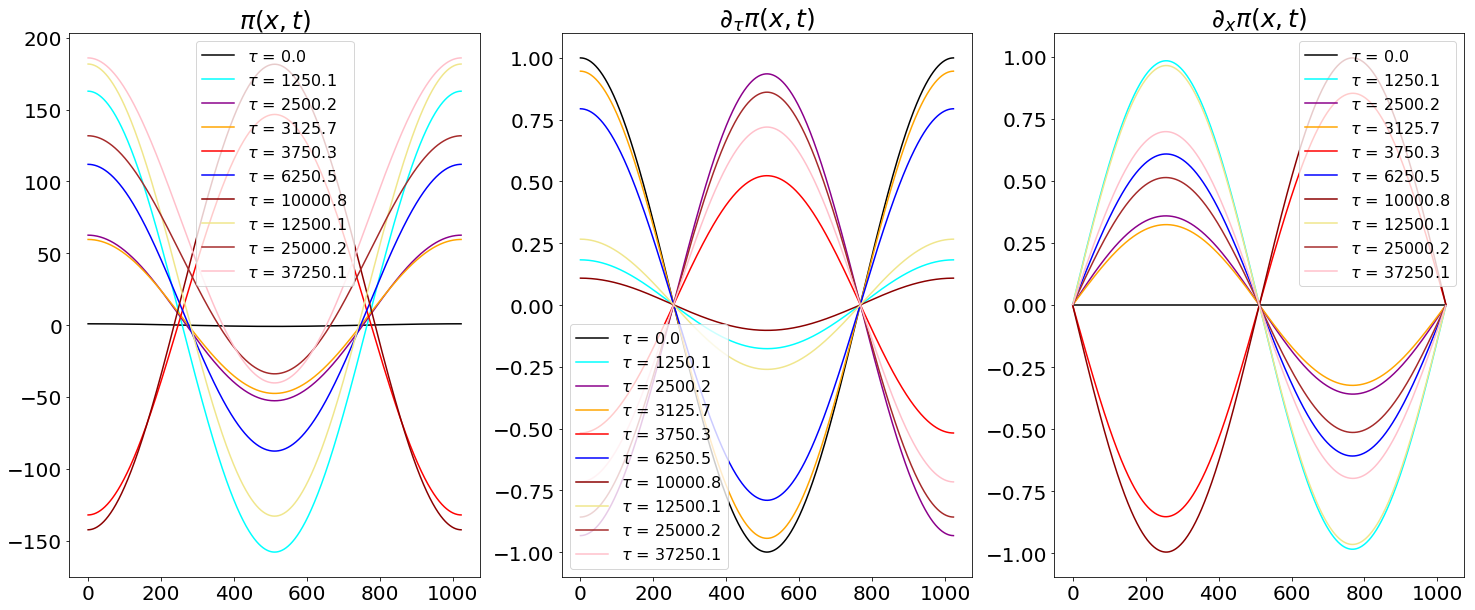

In [135]:
# %matplotlib notebook
# from matplotlib import animation
# import matplotlib.animation

x=np.arange(0,n_grid,1)
fig = plt.figure(figsize=(25,10))
ims  = []
numbers= np.shape(list_tau)[0]
l=0
a1=[0,1,2,3,4,5]
a2=[0,1,2,3,4,5,6,7,8,9]
a3=[0,10,20,25,30,50,80,100,200,298]
for i in a3:
# for i in [0,int(numbers/tauwrite+1),int(numbers/tauwrite+1)*2,numbers-1]:

    plt.subplot(1,3,1)
    im1, = plt.plot(list_tau_pi[i][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(list_tau[i],2)))

    plt.tick_params(labelsize=20)
    plt.title("$\pi(x,t)$",fontsize=25)
#     plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
    plt.legend(fontsize=16)
    plt.subplot(1,3,2)
    im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(list_tau[i],2)))
#     im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16)
    plt.legend(fontsize=16)

    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{\tau}\pi(x,t)$",fontsize=25)
    #########
    plt.subplot(1,3,3)
    im3, =plt.plot(list_dpi_dx[i][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(list_tau[i],2)))
#     im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16)

    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{x}\pi(x,t)$",fontsize=25)

    ims.append([im1,im2,im3])
#     plt.plot(x,(np.abs((x-1024)*np.pi/1024)**(4/3)),label=r"t =  "+str(i*1))
#     plt.text(0,0,'dt = 5.e-4\ndx=1/512 ',family='serif',fontsize="14" )
    
#     plt.xlim(1024-40,1024+40)
# ani = animation.ArtistAnimation(fig, ims, interval=900, blit=True,repeat_delay=1000)
    plt.legend(fontsize=16)
    l=l+1;
# plt.savefig('time_derivatives.pdf')
plt.show()
# ani.save('fields_1DBlowup.mp4',dpi=400)

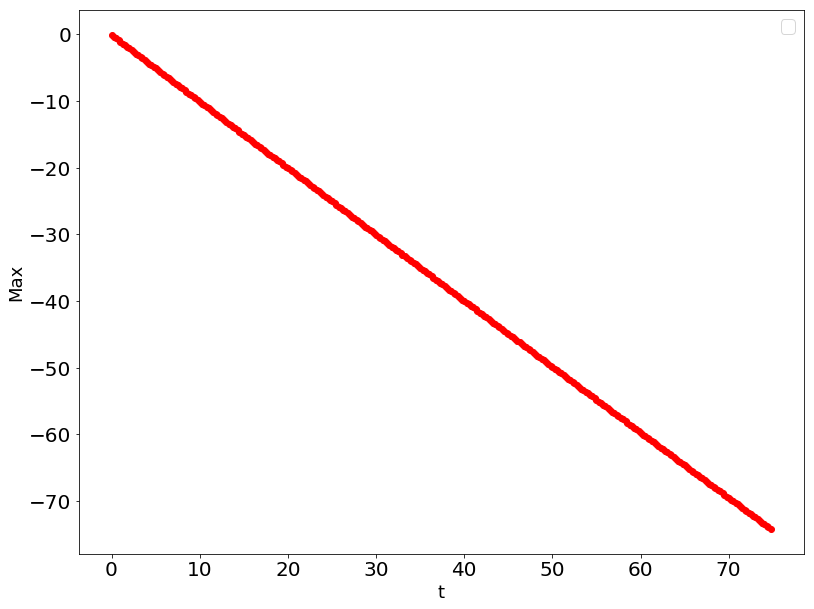

In [129]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

for i in range(0,300):
# for i in [0,int(numbers/tauwrite+1),int(numbers/tauwrite+1)*2,numbers-1]:

    plt.plot(list_tau[i],np.min(list_tau_pi[i][:]),'ro')

plt.ylabel('Max',fontsize=18)
# plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =1$",fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


In [97]:
np.max(list_tau_pi[10])

0.69463341054343763

In [854]:
# x= 2.8043265610979877 *(k0**2 *3./8.)**(1./3.) /(np.abs(k0))
np.max(data[:,0])

77.000100000000842

In [516]:
k0

1.8778650094211646e-05

In [517]:
(data[0,1])

7.5114600376846585e-05

In [489]:
data[0,1]

7.5128361357257312e-05

# ODE solution

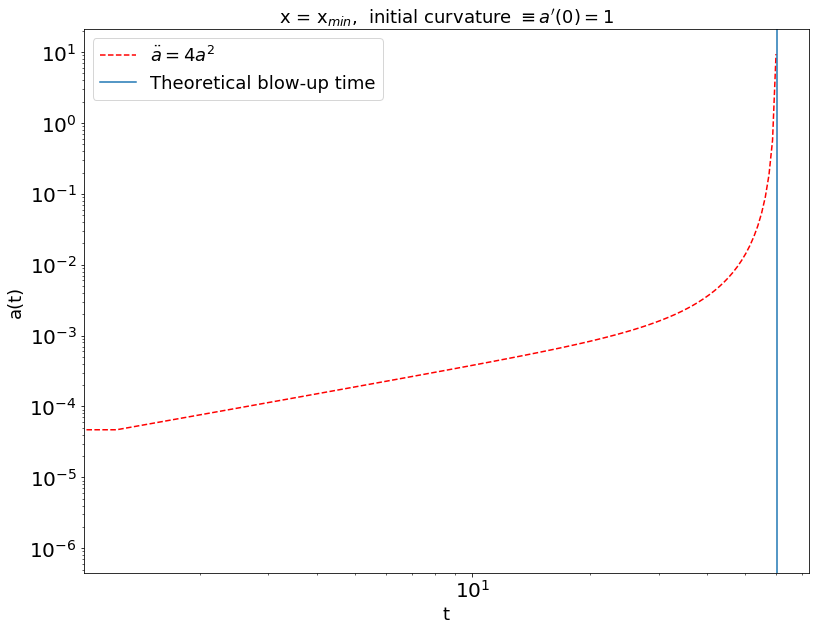

In [589]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

def model_lin_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 1*v*a;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0.000001,3.7461536709378539e-05]

# time points
t = np.linspace(0,60)
t2 = np.linspace(0,0.5)
# solve ODE
# z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
# z_high = odeint(model_higher,z0,t)
# test = odeint(model_lin_higher,z0,t)

# plot results
# plt.plot(t2,(test[:,0]),'b-',label=r'$\ddot{a} =-4 a^3$')
plt.loglog(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')

# plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =a^2-4 a^3$')
plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =1$",fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


In [584]:
2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1]))

60.43748240974778

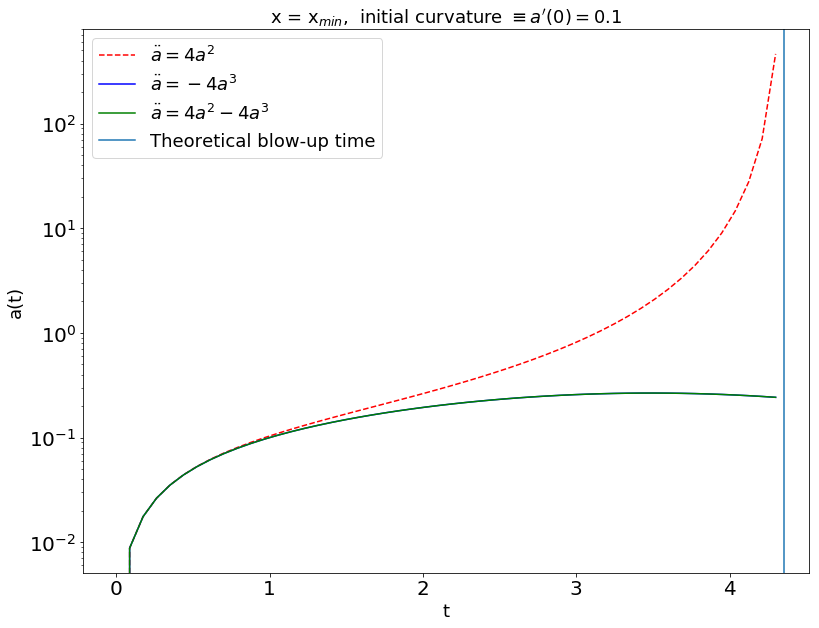

In [575]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,0.1]

# time points
t = np.linspace(0,4.3)
t2 = np.linspace(0,4.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

plt.yscale('log')
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


# ODE for the maxima

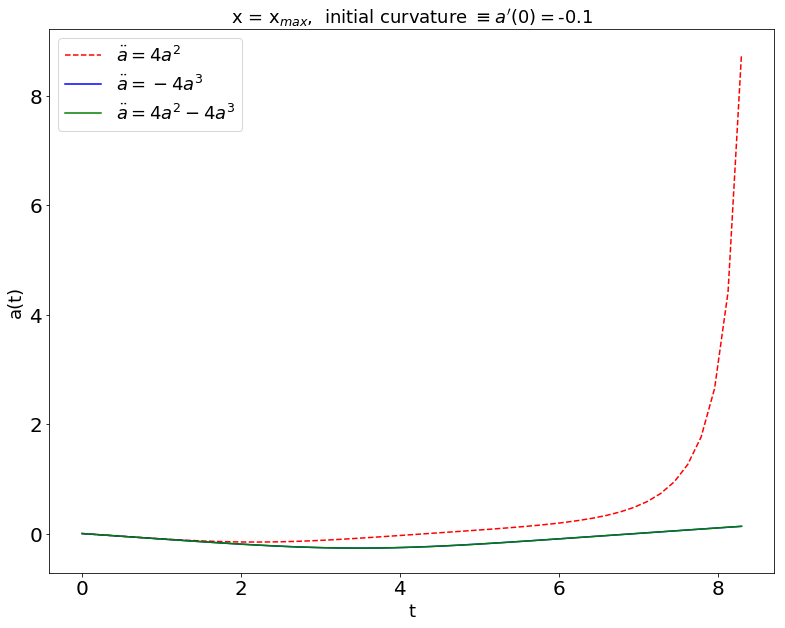

In [89]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,-0.1]

# time points
t = np.linspace(0,8.3)
t2 = np.linspace(0,8.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')$
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


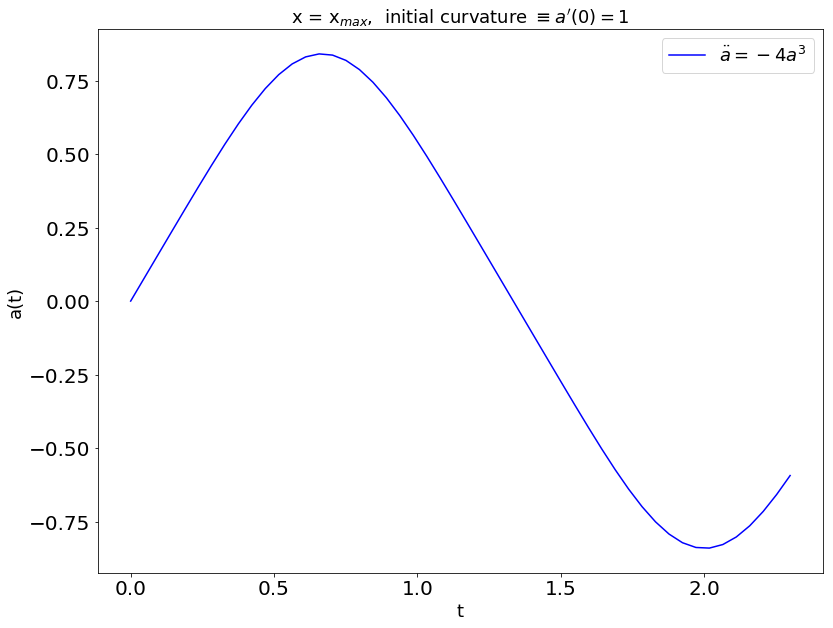

In [112]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,1]

# time points
t = np.linspace(0,3.8)
t2 = np.linspace(0,2.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
# plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')$
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


# Some tests on the FFT

In [ ]:
# Some tests for the Discrete FT: simple test which is easily calculatbale by hand according to X_k = Sigma_n=0^N-1 x_n exp(-2 pi i k n )
test_data = [0,1]
FT_test = np.fft.fft(test_data)
# print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# Computing the powerspectrum and frequencies:
spec = np.abs(np.fft.fft(test_data))**2 # computing the spectrum which is absolute value of Forier transformation
freqs = np.fft.fftfreq(len(FT_test)) # discrete frequencies associated to the length of the field
print("Data: ",test_data)
print(" discrete Fourier transform : ",FT_test)
print(" Frequencies: ",freqs)
print(" poswer spectrum:", spec,  )
# Very simple example which could easily be checked by hand
# Real space data
#### For illustration
# plt.figure(figsize=(8,6))
# plt.plot(test_data[:],"o",markersize = 8)
# plt.show()
# # FFTW
# plt.figure(figsize=(8,6))
# plt.plot(freqs,FT_test,"o",markersize = 8)
# plt.show()
# # Powerspectrum
# plt.figure(figsize=(8,6))
# plt.plot(np.abs(freqs),spec,"o",markersize = 8)
# plt.show()

#############################
######## Sine, 1/x example ## 
#############################

test_data2  = np.sin(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function
# test_data2  = 1./(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function

FT_test2 = np.fft.fft(test_data2) # Computing FFTW
# print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# Computing the powerspectrum and frequencies:
spec2 = np.abs(np.fft.fft(test_data2))**2 # computing the spectrum which is absolute value of Forier transformation
freqs2 = np.fft.fftfreq(len(FT_test2)) # discrete frequencies associated to the length of the field
# print("Data: ",test_data2)
# print(" discrete Fourier transform : ",FT_test2)
# print(" Frequencies: ",freqs2)
# print(" poswer spectrum:", spec2,  )
# Very simple example which could easily be checked by hand
# Real space data
plt.figure(figsize=(8,6))
plt.plot(test_data2[:],".",markersize = 8)
plt.show()
# FFTW
plt.figure(figsize=(8,6))
plt.plot(freqs2,np.abs(FT_test2),".",markersize = 8)
plt.show()
# Powerspectrum
plt.figure(figsize=(8,6))
plt.plot(np.abs(freqs2),spec2,".",markersize = 8)
plt.show()

